# Setting Up

In [1]:
options(digits = 3)

Sys.setenv(LANG = "en")

library(haven)
library(JWileymisc)
library(ggplot2)
library(ggpubr)
library(visreg)
library(survey)
library(tidyverse)
library(dplyr)
library(ggExtra)
library(psych)
library(ggthemes)
library(scales)
library(olsrr)
library(modelsummary)
library(marginaleffects)
library(tidyverse)
library(betareg)
library(brms)
library(corrplot)
library(BayesFactor)
library(car)
library(lm.beta)

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following object is masked from ‘package:JWileymisc’:

    cor2c

In [2]:
# read in data
setwd('/home/pavgreen/Documents/LRGS/EEG/alt/study')

db <- as.data.frame(read_csv("mind.csv"))

Rows: 45 Columns: 88
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): When is your date of birth?, Which sex were you assigned at birth?...
dbl (81): Please enter your participant number, Please rate each of the foll...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Demographic

## Age

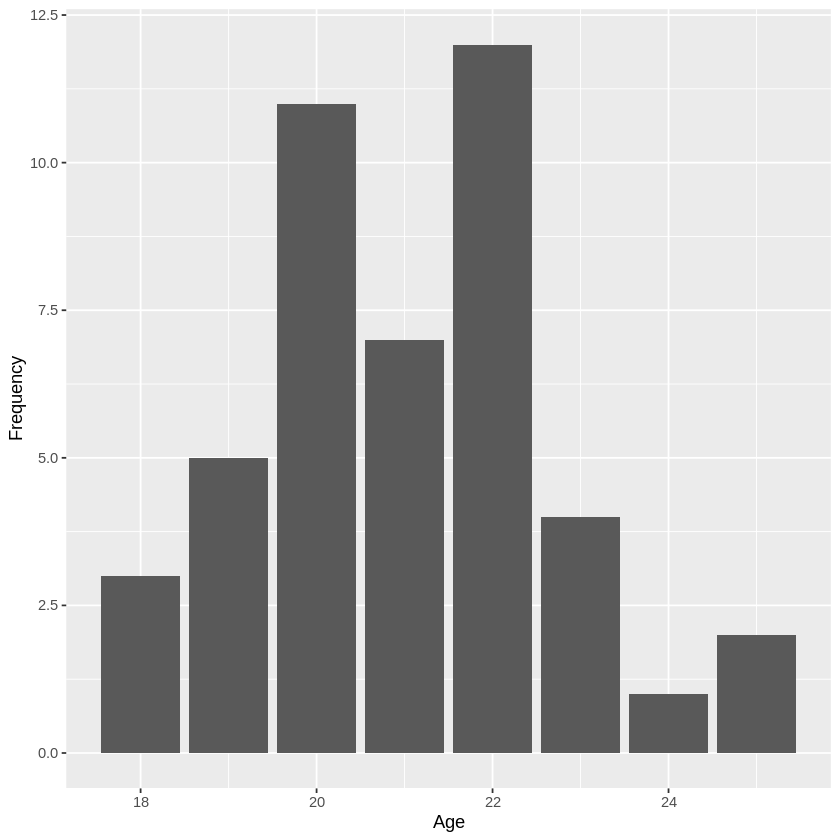

In [3]:
db %>%
    select(c(1:4)) %>%
        mutate(Age = floor(time_length(difftime(Sys.Date(), dmy(db[[2]])), "years"))) %>%
            ggplot(aes(Age)) +
                geom_bar() +
                    ylab("Frequency")

## Sex and Gender

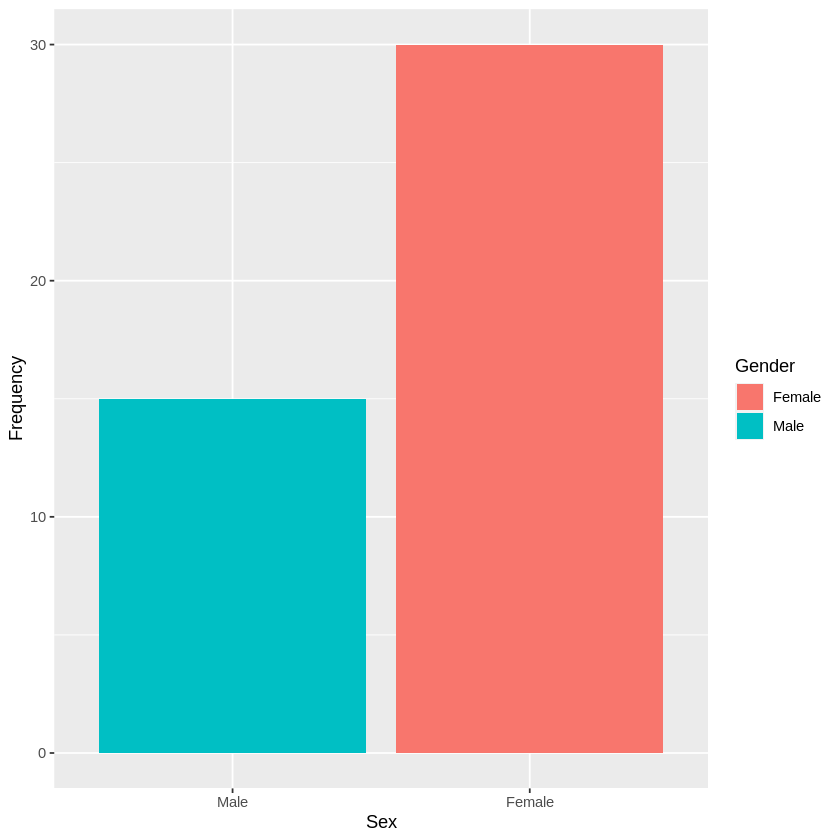

In [4]:
db %>% 
    select(c(1, 3, 4)) %>%
        mutate(Sex = factor(db[[3]], levels = c("Male", "Female")), Gender = factor(db[[4]])) %>%
            ggplot(aes(Sex, fill = Gender)) +
                geom_bar() +
                    ylab("Frequency")

db <- db %>% mutate(Sex = ifelse(db[[3]] == 'Female', 1L, 0L))

sex <- db[["Sex"]]

## Mindfulness Experience

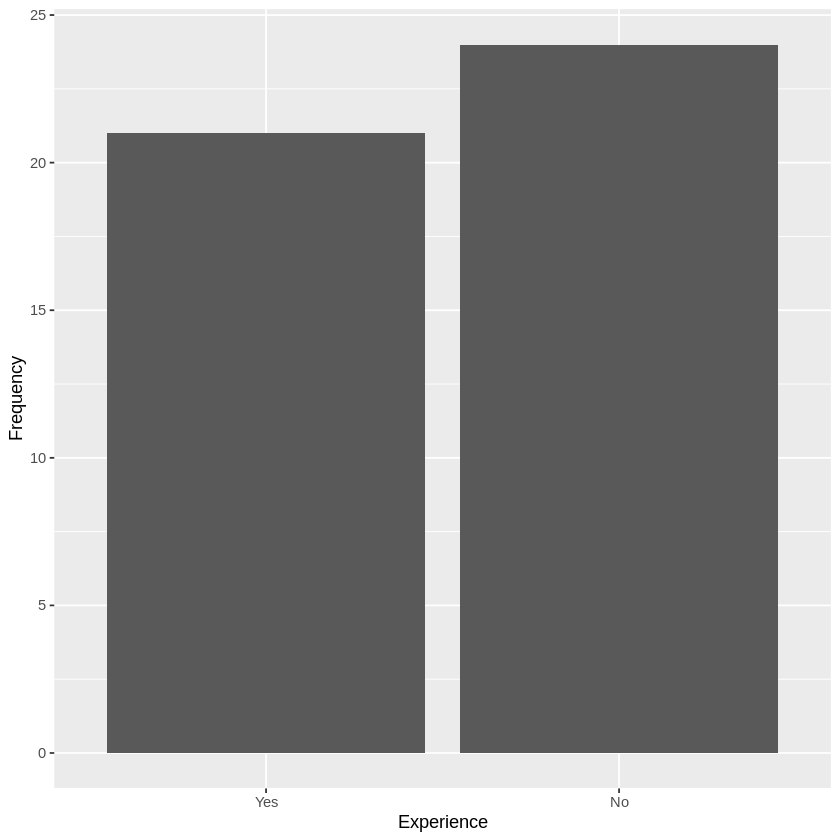

In [5]:
db <- db %>%
        mutate(Experience = factor(db[[5]], levels = c("Yes", "No"))) 

db %>%
    ggplot(aes(Experience)) +
        geom_bar() +
            ylab("Frequency")

In [6]:
db %>%
    filter(db[, 5] == "Yes") %>%
        select(c(5:8))

"Have you ever practiced meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently","If you responded 'yes' to the previous question, what is the total length of time (in months) you practiced/have been practicing meditation, mindfulness, or contemplative prayer?","If you responded 'yes' to the previous question, which option best describes the frequency of your typical practice of meditation, mindfulness, or contemplative prayer?"
<chr>,<chr>,<chr>,<chr>
Yes,"breathing meditation, diary\ mood tracking",on and off for the last 6 years...,Practice 4-5 times per week
Yes,mindfulness - pay attention to my surroundings or what i eat (pay attention to the taste and my chewing),im not sure but i think i started since sept 2022 ?,Practice daily or near daily
Yes,mindfulness,2 months,Not currently practicing
Yes,mindfulness,1/4 month,Practice weekly
Yes,meditation for 5-10 minutes a few years ago,1 month,Not currently practicing
Yes,meditate once in a while,once or twice a month for 5 minutes,Practice 1-2 times a month
Yes,meditation,6 months,Not currently practicing
Yes,"Journaling, affirmations, meditation, artistics form of expression for grounding (painting)",8 months,Practice weekly
Yes,mindfulness,approximately 10 minutes,Practice 4-5 times per week


In [7]:
db <- db %>% mutate(Experience = ifelse(Experience == 'Yes', 1L, 0L))

exp <- db[["Experience"]]

---

# Cronbach Alpha

## FFMQ

In [8]:
db[, c(1, 9:47)]

Please enter your participant number,"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I’m good at finding words to describe my feelings.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I criticize myself for having irrational or inappropriate emotions.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I perceive my feelings and emotions without having to react to them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I do things, my mind wanders off and I’m easily distracted.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I take a shower or bath, I stay alert to the sensations of water on my body.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I can easily put my beliefs, opinions, and expectations into words.]","Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I don’t pay attention to what I’m doing because I’m daydreaming, worrying, or otherwise distracted.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I watch my feelings without getting lost in them.],⋯,Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I think some of my emotions are bad or inappropriate and I shouldn’t feel them.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I notice visual elements in art or nature, such as colors, shapes, textures, or patterns of light and shadow.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [My natural tendency is to put my experiences into words.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I just notice them and let them go.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I do jobs or tasks automatically without being aware of what I’m doing.],"Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [When I have distressing thoughts or images, I judge myself as good or bad, depending on what the thought/image is about.]",Please rate each of the following statements using the scale provided. Select the option that best describes your own opinion of what is generally true for you. [I pay attention to how my emotions affect my thoughts and behavior.],Please rate each of the following statements using the scale provided. Select the option that best describes your own opin

In [9]:
psych::alpha(x = db[, 9:47])

Warning message in psych::alpha(x = db[, 9:47]):
“Some items were negatively correlated with the total scale and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [I notice the smells and aromas of things.] ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: psych::alpha(x = db[, 9:47])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.89      0.89    0.99      0.17   8 0.023    3 0.45     0.15

    95% confidence boundaries 
         lower alpha upper
Feldt     0.84  0.89  0.93
Duhachek  0.84  0.89  0.94

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                     raw_alpha
Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]                                                             0.89
Please rate each of the following statements u

In [10]:
x <- c(1, 6, 11, 15, 20, 26, 31, 36) + 8
x

y <- c(5, 8, 13, 18, 23, 28, 34, 38) + 8
y

z <- c(2 + 7 + 12, 16, 22, 27, 32, 37) + 8
z

m <- c(3, 10, 14, 17, 25, 30, 35, 39) + 8
m

nr <- c(4, 9, 19, 21, 24, 29, 33) + 8
nr

[1]  9 14 19 23 28 34 39 44

[1] 13 16 21 26 31 36 42 46

[1] 29 24 30 35 40 45

[1] 11 18 22 25 33 38 43 47

[1] 12 17 27 29 32 37 41

In [11]:
psych::alpha(x = db[, nr])


Reliability analysis   
Call: psych::alpha(x = db[, nr])

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean   sd median_r
      0.69      0.69    0.71      0.24 2.3 0.07    3 0.57     0.24

    95% confidence boundaries 
         lower alpha upper
Feldt     0.53  0.69  0.81
Duhachek  0.55  0.69  0.83

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                     raw_alpha
Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [I perceive my feelings and emotions without having to react to them.]                                                                  0.64
Please rate each of the following statements using

## STAI

In [12]:
db[, c(1, 60:79)]

Please enter your participant number,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel nervous and restless.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel satisfied with myself.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I wish I could be as happy as others seem to be.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel like a failure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel rested.],"Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am 'cool, calm, and collected'.]",Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel that difficulties are piling up so that I can't overcome them.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I worry too much over something that really doesn't matter.],⋯,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I have disturbing thoughts.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so kee

In [13]:
psych::alpha(x = db[, 60:79])


Reliability analysis   
Call: psych::alpha(x = db[, 60:79])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.92      0.92    0.96      0.38  12 0.016  2.5 0.6     0.37

    95% confidence boundaries 
         lower alpha upper
Feldt     0.89  0.92  0.95
Duhachek  0.89  0.92  0.96

 Reliability if an item is dropped:
                                                                                                                                                                                                                                                                                                  raw_alpha
Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]                                                                              0.92
Please read the following statements and select the i

---

# Behavioural Data

In [14]:
db[, c(1, 81:86)]

Please enter your participant number,Go Correct,noGo Correct,delta Go,Go Correct 1,noGo Correct 1,Go Correct 2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9001,98.8,81.0,62.8,98.5,80.0,99.0
9002,97.5,72.0,63.5,98.5,72.0,96.5
9003,95.0,67.0,62.6,94.0,68.0,96.0
9004,97.8,65.0,65.2,98.0,82.0,97.5
9005,98.2,80.0,62.6,98.0,88.0,98.5
9006,97.5,78.6,62.8,96.5,76.0,98.5
9007,96.1,44.8,67.8,96.5,52.0,95.6
9008,96.5,68.0,63.5,96.0,66.0,97.0
9009,98.2,52.5,68.3,97.5,58.0,99.0


In [15]:
mean(db[, c(81)])
mean(db[, c(82)])
sd(db[, c(81)])
sd(db[, c(82)])

t.test(db[, c(81)], db[, c(82)], paired=TRUE)
differences <- db[, c(81)] - db[, c(82)]
shapiro.test(differences)
which(abs(differences - mean(differences)) > 3*sd(differences))
mean(differences)/sd(differences)

[1] 95.5

[1] 64.3

[1] 3.13

[1] 15.6


	Paired t-test

data:  db[, c(81)] and db[, c(82)]
t = 14, df = 44, p-value <2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 26.8 35.6
sample estimates:
mean difference 
           31.2 



	Shapiro-Wilk normality test

data:  differences
W = 1, p-value = 0.2


integer(0)

[1] 2.13

# FFMQ and STAI

In [16]:
db[, c(1, 48:59)]

Please enter your participant number,Observing Total,Describing Total,ActAware Total,Nonjudging Total,Nonreactivity Total,FFMQ Total,Observing Mean,Describing Mean,ActAware Mean,Nonjudging Mean,Nonreactivity Mean,FFMQ Mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9001,23,25,17,19,15,99,2.88,3.12,2.12,2.38,2.14,2.54
9002,26,30,29,29,24,138,3.25,3.75,3.62,3.62,3.43,3.54
9003,30,30,27,20,19,126,3.75,3.75,3.38,2.50,2.71,3.23
9004,34,38,37,29,26,164,4.25,4.75,4.62,3.62,3.71,4.21
9005,29,9,23,14,20,95,3.62,1.12,2.88,1.75,2.86,2.44
9006,28,22,28,29,20,127,3.50,2.75,3.50,3.62,2.86,3.26
9007,22,26,28,31,17,124,2.75,3.25,3.50,3.88,2.43,3.18
9008,29,26,18,17,24,114,3.62,3.25,2.25,2.12,3.43,2.92
9009,18,16,23,28,24,109,2.25,2.00,2.88,3.50,3.43,2.79


In [17]:
db[, c(1, 60:80)]

Please enter your participant number,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel nervous and restless.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel satisfied with myself.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I wish I could be as happy as others seem to be.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel like a failure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel rested.],"Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am 'cool, calm, and collected'.]",Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel that difficulties are piling up so that I can't overcome them.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I worry too much over something that really doesn't matter.],⋯,Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I lack self-confidence.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel secure.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I make decisions easily.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel inadequate.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I am content.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [Some unimportant thought runs through my mind and bothers me.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I take disappointments so keenly I can't put them out of my mind.],Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each st

---

# Setting variables

In [18]:
obt = db[["Observing Total"]]
dbt = db[["Describing Total"]]
aat = db[["ActAware Total"]]
nrt = db[["Nonreactivity Total"]]
njt = db[["Nonjudging Total"]]
stai = db[["STAI Total"]]
ffmqt = db[["FFMQ Total"]]

gc = db[["Go Correct"]]
ngc = db[["noGo Correct"]]
dgc = db[["delta Go"]]

gc1 = db[["Go Correct 1"]]
ngc1 = db[["noGo Correct 1"]]

gc2 = db[["Go Correct 2"]]
ngc2 = db[["noGo Correct 2"]]

fgc <- gc/100
fngc <- ngc/100

fngw <- 1-fngc

zhr <- (fgc - mean(fgc))/sd(fgc)
zfr <- (fngc - mean(fngw))/sd(fngw)
dprime <- zhr - zfr

In [19]:
mean(ngc)
sd(ngc)
median(ngc)

[1] 64.3

[1] 15.6

[1] 67

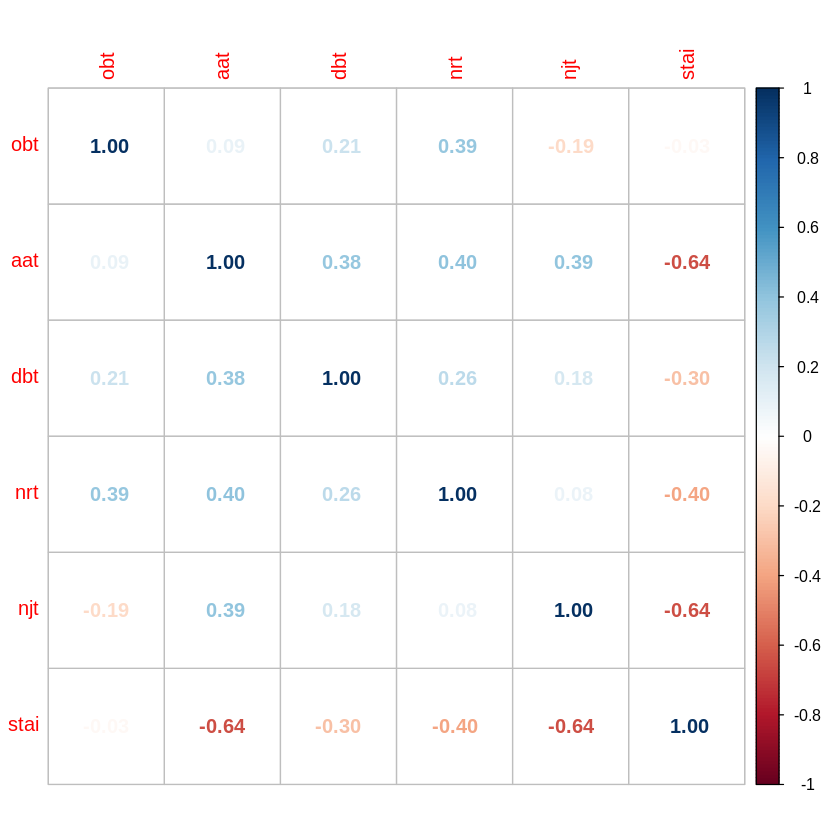

In [20]:
df <- data.frame(obt, aat, dbt, nrt, njt, stai)

corrplot(cor(df), method = "number")

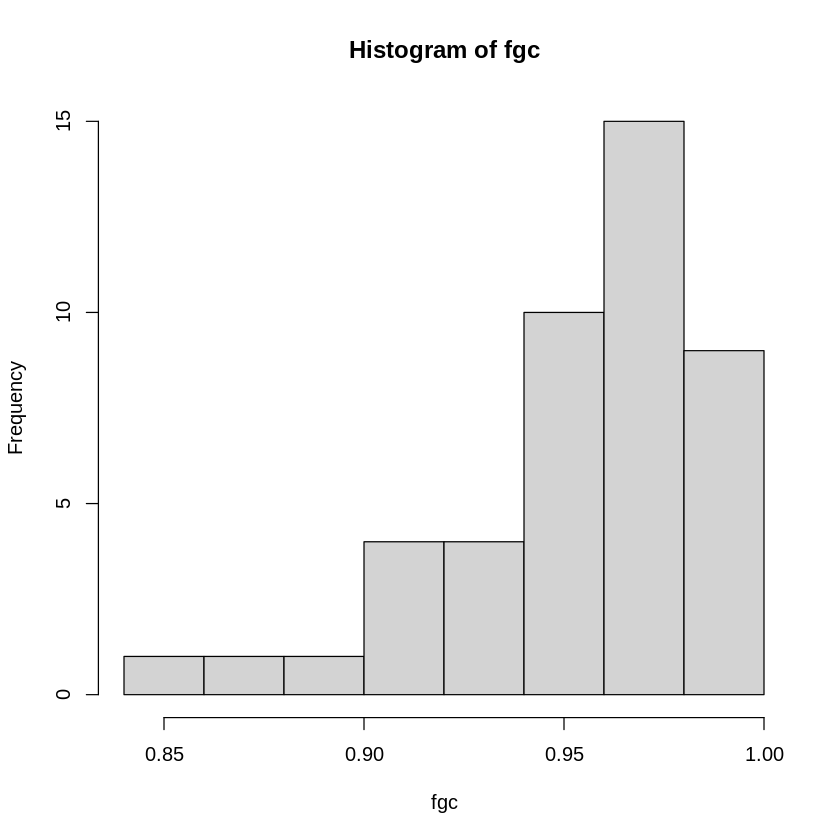

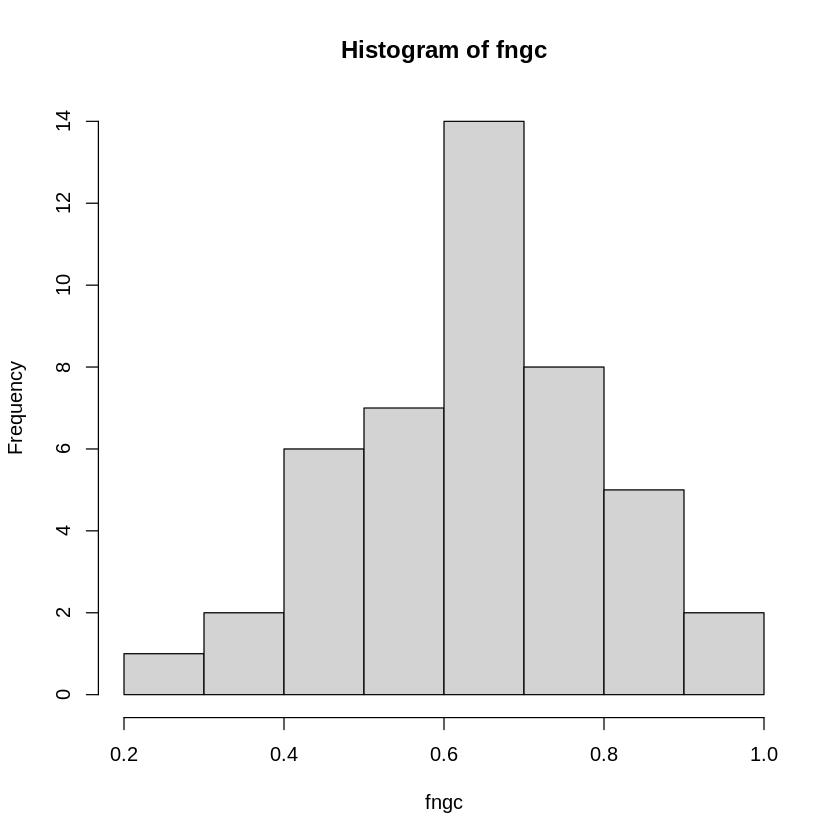

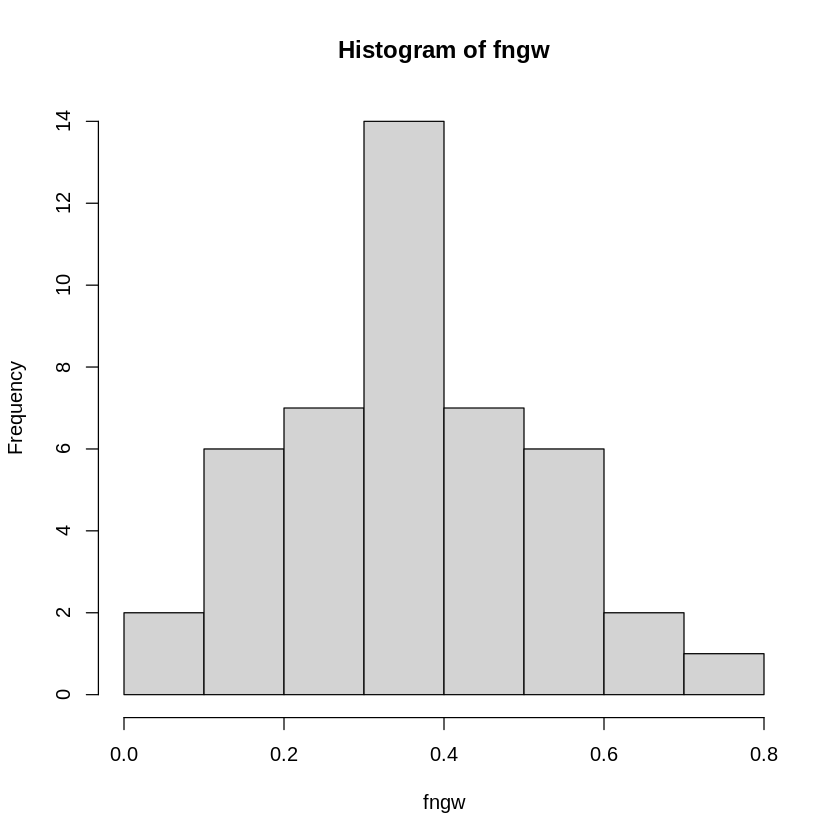

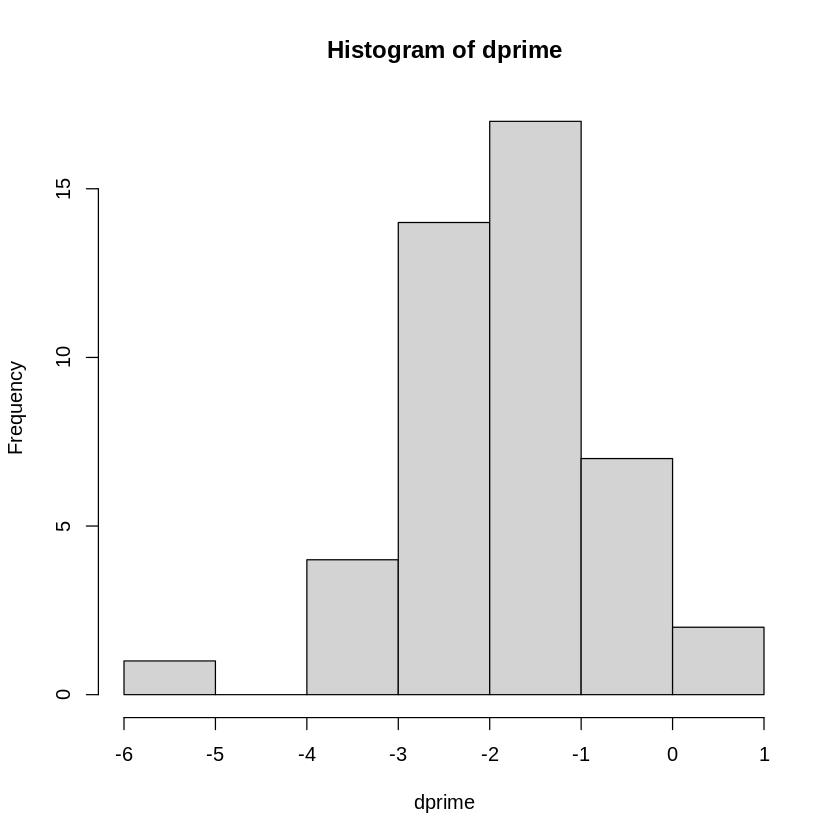

In [21]:
hist(fgc)
hist(fngc)
hist(fngw)
hist(dprime)

# Prelim

## Basic lm

### Trait Anx and Mindfulness Exp

In [22]:
s <- db[c(89, 90, 48:52, 80, 81, 82)]
s[[1]] <- factor(s[[1]])
s[[2]] <- factor(s[[2]])

m <- s[s[1] == 0, ]
f <- s[s[1] == 1, ]

ne <- s[s[2] == 0, ]
he <- s[s[2] == 1, ]

grp <- he
shapiro.test(grp[[3]])
shapiro.test(grp[[4]])
shapiro.test(grp[[9]])
shapiro.test(grp[[10]])

iv <- s[[1]]
leveneTest(s[[3]] ~ iv)
t.test(s[[3]] ~ iv)

leveneTest(s[[4]] ~ iv)
t.test(s[[4]] ~ iv)

wilcox.test(s[[9]] ~ iv)

leveneTest(s[[10]] ~ iv)
t.test(s[[10]] ~ iv)
s


	Shapiro-Wilk normality test

data:  grp[[3]]
W = 0.9, p-value = 0.06



	Shapiro-Wilk normality test

data:  grp[[4]]
W = 1, p-value = 0.5



	Shapiro-Wilk normality test

data:  grp[[9]]
W = 0.8, p-value = 3e-04



	Shapiro-Wilk normality test

data:  grp[[10]]
W = 0.9, p-value = 0.2


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.0322,0.859
,43,NA,NA



	Welch Two Sample t-test

data:  s[[3]] by iv
t = -0.4, df = 26, p-value = 0.7
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -4.44  2.91
sample estimates:
mean in group 0 mean in group 1 
           25.4            26.2 


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.0236,0.879
,43,NA,NA



	Welch Two Sample t-test

data:  s[[4]] by iv
t = 0.9, df = 31, p-value = 0.4
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.20  5.54
sample estimates:
mean in group 0 mean in group 1 
           25.9            24.2 


Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  s[[9]] by iv
W = 260, p-value = 0.4
alternative hypothesis: true location shift is not equal to 0


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.95,0.17
,43,NA,NA



	Welch Two Sample t-test

data:  s[[10]] by iv
t = 2, df = 38, p-value = 0.04
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  0.415 17.739
sample estimates:
mean in group 0 mean in group 1 
           70.4            61.3 


Sex,Experience,Observing Total,Describing Total,ActAware Total,Nonjudging Total,Nonreactivity Total,STAI Total,Go Correct,noGo Correct
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,23,25,17,19,15,63,98.8,81.0
0,1,26,30,29,29,24,52,97.5,72.0
1,1,30,30,27,20,19,48,95.0,67.0
0,1,34,38,37,29,26,29,97.8,65.0
1,1,29,9,23,14,20,69,98.2,80.0
1,1,28,22,28,29,20,45,97.5,78.6
1,0,22,26,28,31,17,45,96.1,44.8
1,1,29,26,18,17,24,65,96.5,68.0
1,0,18,16,23,28,24,47,98.2,52.5


In [23]:
#exp <- factor(exp)

#ols_test_normality(exp)
#ols_plot_resid_qq(exp)
#ols_plot_resid_fit(exp)
#ols_test_breusch_pagan(exp, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

#t_test_result <- t.test(gc ~ exp, data = data)

### STAI and FFMQ Total


Call:
lm(formula = stai ~ ffmqt)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.688  -7.127   0.444   4.223  21.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 104.8055     9.0610   11.57  8.7e-15 ***
ffmqt        -0.4649     0.0761   -6.11  2.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.82 on 43 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.452 
F-statistic: 37.3 on 1 and 43 DF,  p-value: 2.57e-07


,2.5 %,97.5 %
(Intercept),86.532,123.079
ffmqt,-0.619,-0.311


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.991          0.9773 
Kolmogorov-Smirnov        0.0696         0.9707 
Cramer-von Mises          3.2565         0.0000 
Anderson-Darling          0.1933         0.8889 
-----------------------------------------------

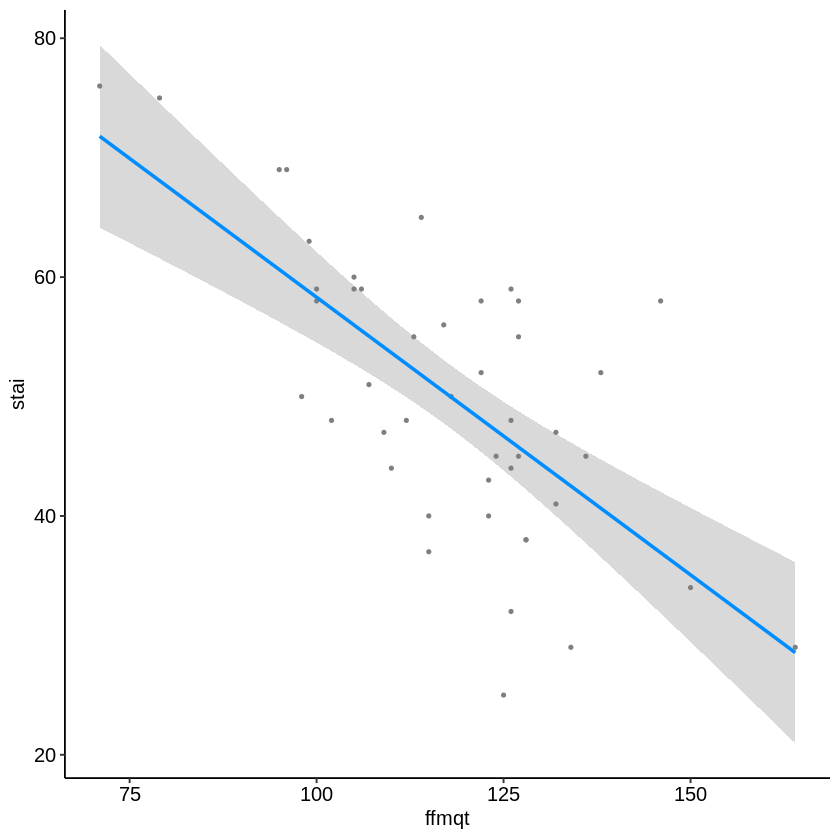

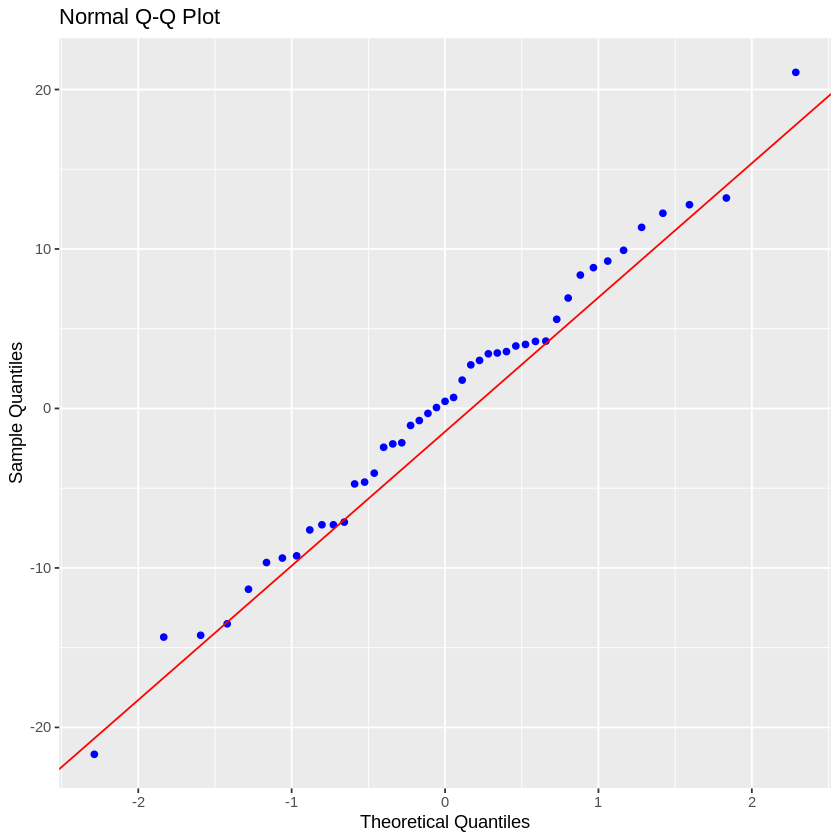


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

    Data      
 -------------
 Response : stai 
 Variables: m2 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  m2               1.8251     1    0.1767 
 ----------------------------------------
  simultaneous     1.8251     1    0.1767 
 ----------------------------------------

Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”
Warning message in .local(x, ...):
“singularity problem”
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


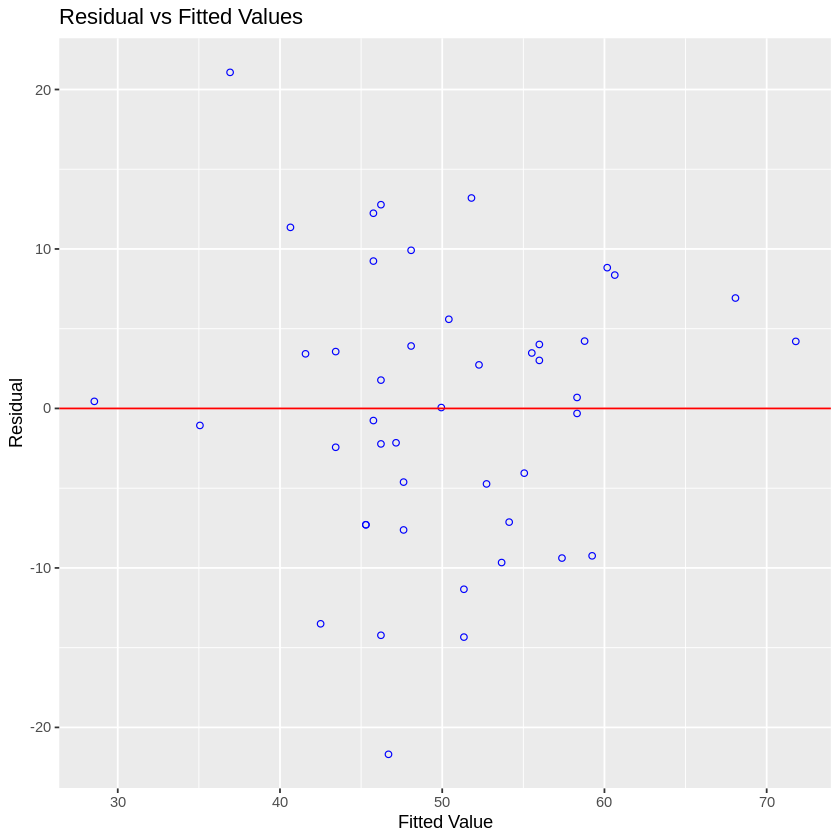

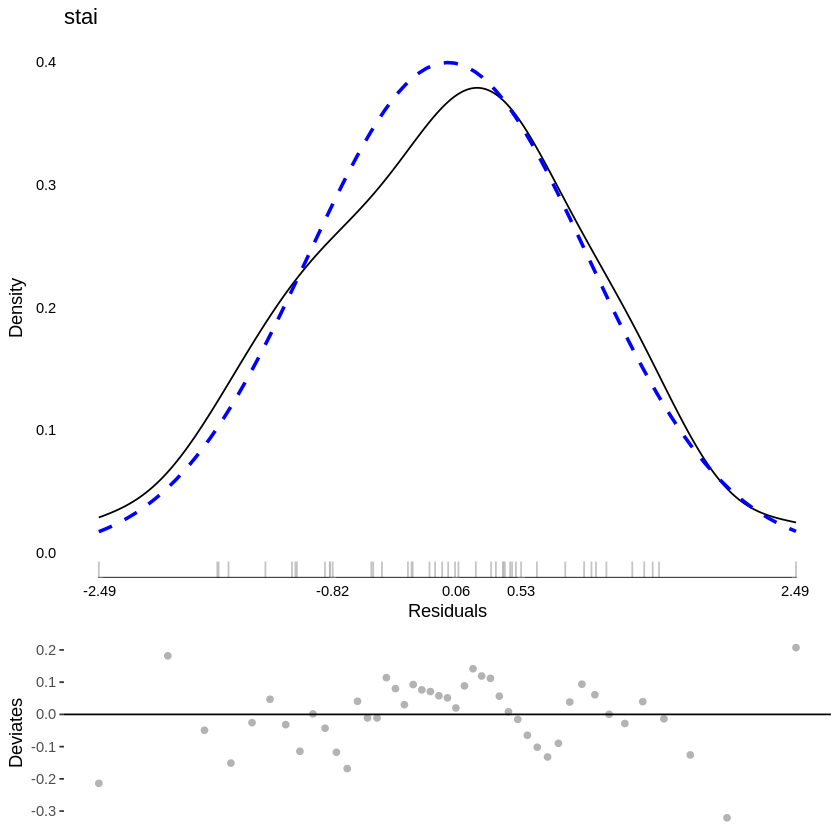

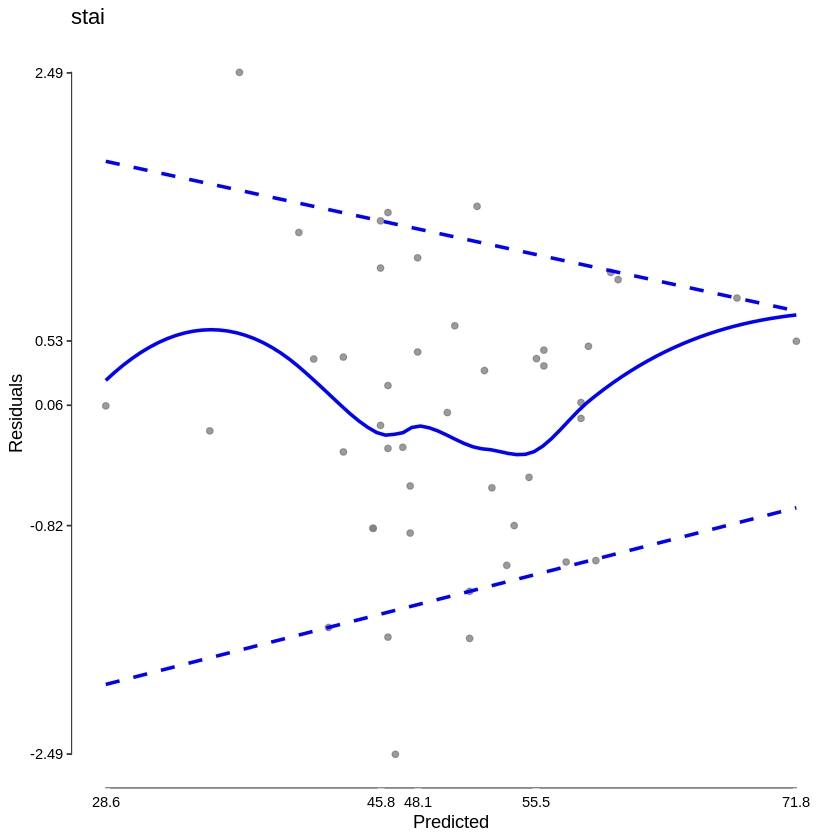

In [24]:
malt <- lm(stai ~ ffmqt)

summary(malt)
confint(malt)
visreg(malt, xvar = "ffmqt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

---

### Controlling for STAI and Facets


Call:
lm(formula = stai ~ obt + aat + dbt + njt + nrt)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.194  -4.449   0.574   5.433  13.611 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.0201     8.4956   11.77  2.1e-14 ***
obt          -0.0280     0.2400   -0.12   0.9076    
aat          -0.6900     0.2266   -3.05   0.0041 ** 
dbt          -0.0371     0.2065   -0.18   0.8584    
njt          -0.8783     0.1986   -4.42  7.6e-05 ***
nrt          -0.5961     0.3425   -1.74   0.0897 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.68 on 39 degrees of freedom
Multiple R-squared:  0.632,	Adjusted R-squared:  0.584 
F-statistic: 13.4 on 5 and 39 DF,  p-value: 1.3e-07


,2.5 %,97.5 %
(Intercept),82.836,117.2041
obt,-0.513,0.4573
aat,-1.148,-0.2318
dbt,-0.455,0.3806
njt,-1.280,-0.4766
nrt,-1.289,0.0967


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9817         0.6871 
Kolmogorov-Smirnov        0.0932         0.7948 
Cramer-von Mises          3.511          0.0000 
Anderson-Darling          0.2474         0.7386 
-----------------------------------------------

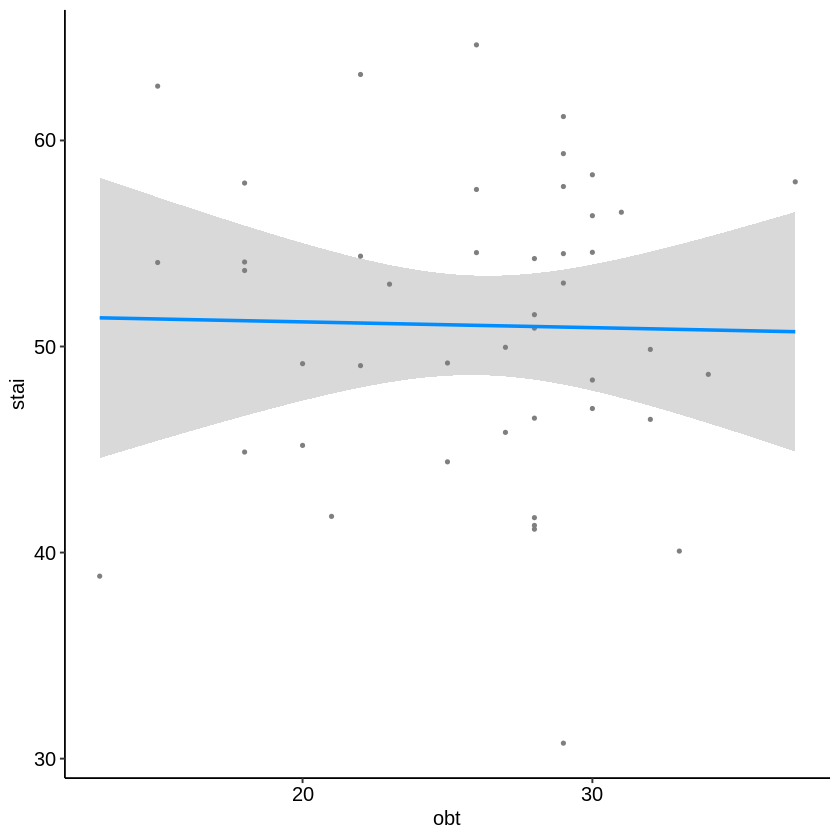

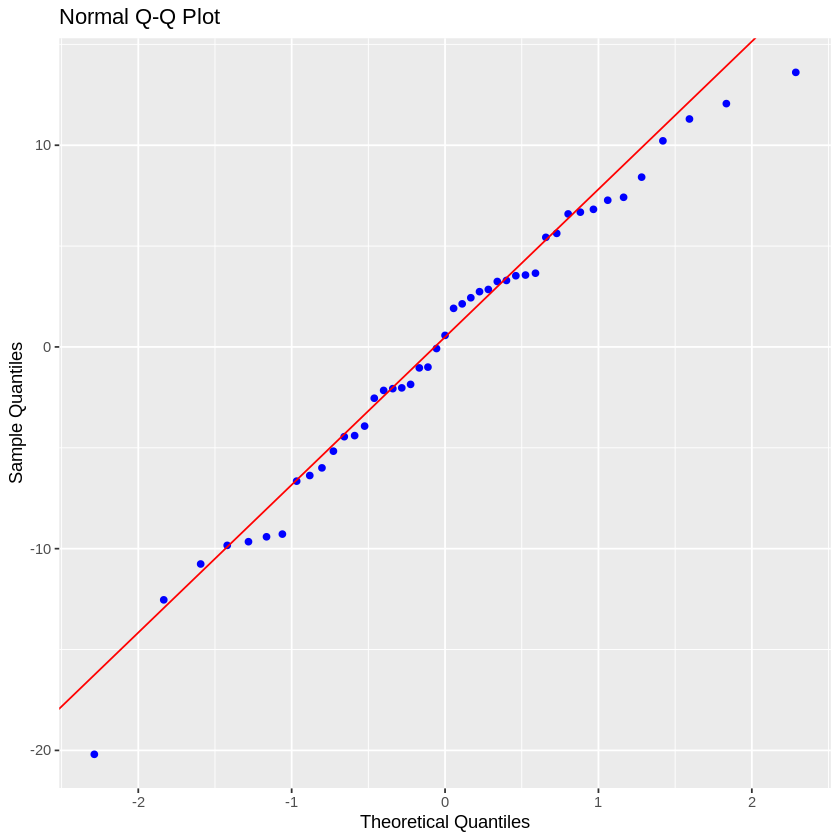


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data              
 ------------------------------
 Response : stai 
 Variables: obt aat dbt njt nrt 

      Test Summary (Bonferroni p values)     
 ------------------------------------------
  Variable           chi2      df      p    
 ------------------------------------------
  obt              0.077948     1    1.0000 
  aat              0.000356     1    1.0000 
  dbt              0.336119     1    1.0000 
  njt              0.065474     1    1.0000 
  nrt              1.218944     1    1.0000 
 ------------------------------------------
  simultaneous     2.446475     5    0.7845 
 ------------------------------------------

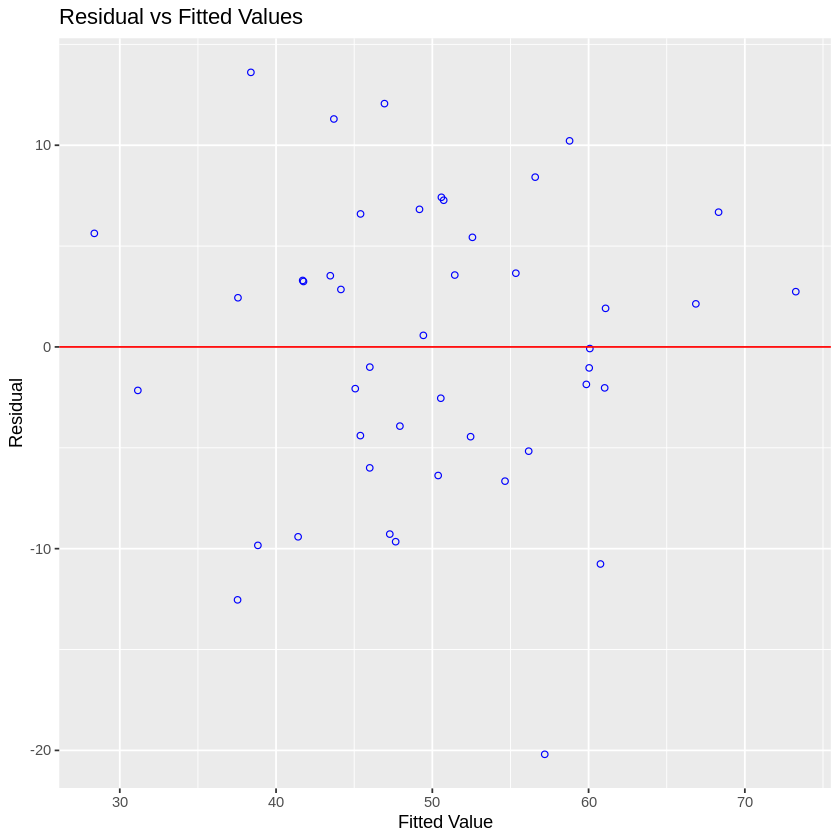

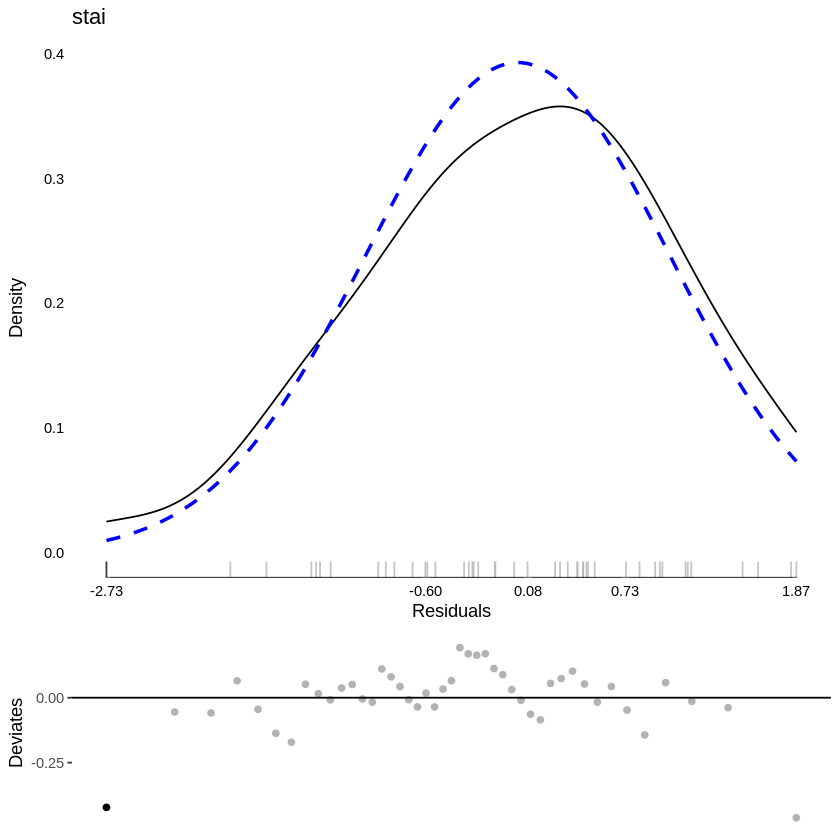

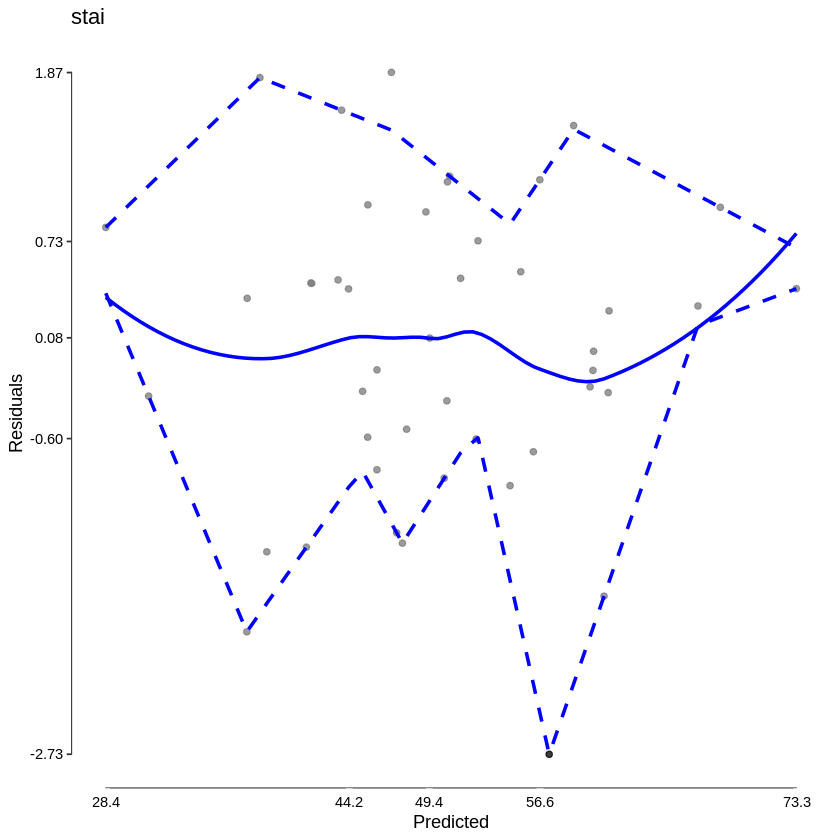

In [25]:
malt <- lm(stai ~ obt + aat + dbt + njt + nrt)

summary(malt)
confint(malt)
visreg(malt, xvar = "obt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### Go Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = gc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-6.475 -1.526  0.326  2.160  3.697 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 83.98658    6.20096   13.54    4e-16 ***
xvar         0.26834    0.08621    3.11   0.0035 ** 
obt         -0.23433    0.08209   -2.85   0.0069 ** 
dbt          0.09171    0.07066    1.30   0.2021    
nrt         -0.00623    0.12161   -0.05   0.9594    
njt          0.04243    0.08324    0.51   0.6132    
stai         0.15883    0.05477    2.90   0.0062 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.63 on 38 degrees of freedom
Multiple R-squared:  0.391,	Adjusted R-squared:  0.294 
F-statistic: 4.06 on 6 and 38 DF,  p-value: 0.00306


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9514         0.0572 
Kolmogorov-Smirnov        0.1185         0.5142 
Cramer-von Mises          3.1167         0.0000 
Anderson-Darling          0.632          0.0934 
-----------------------------------------------

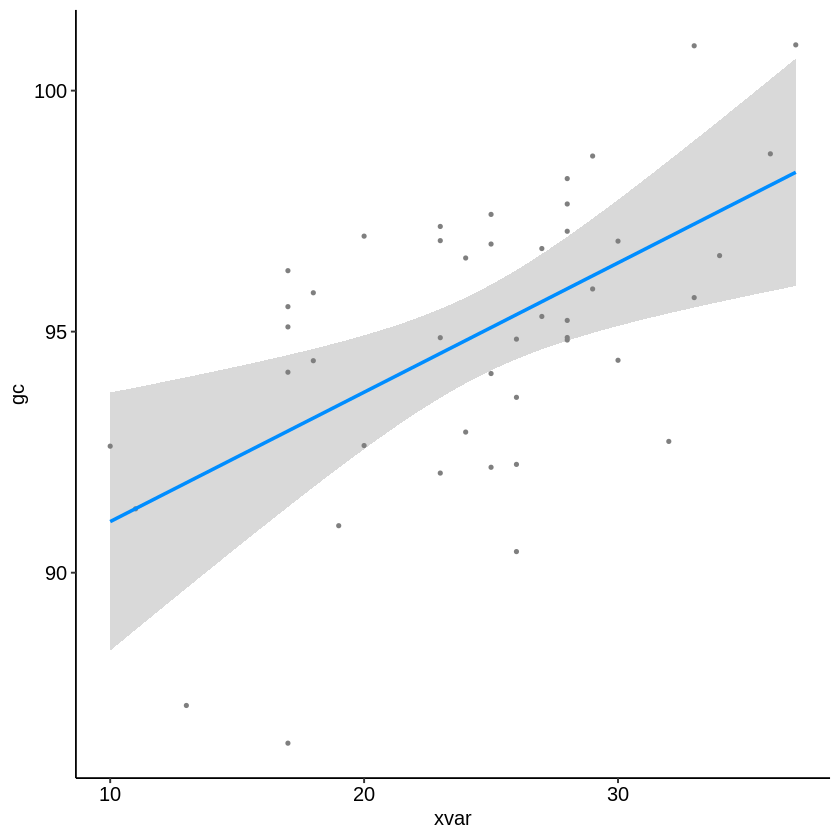

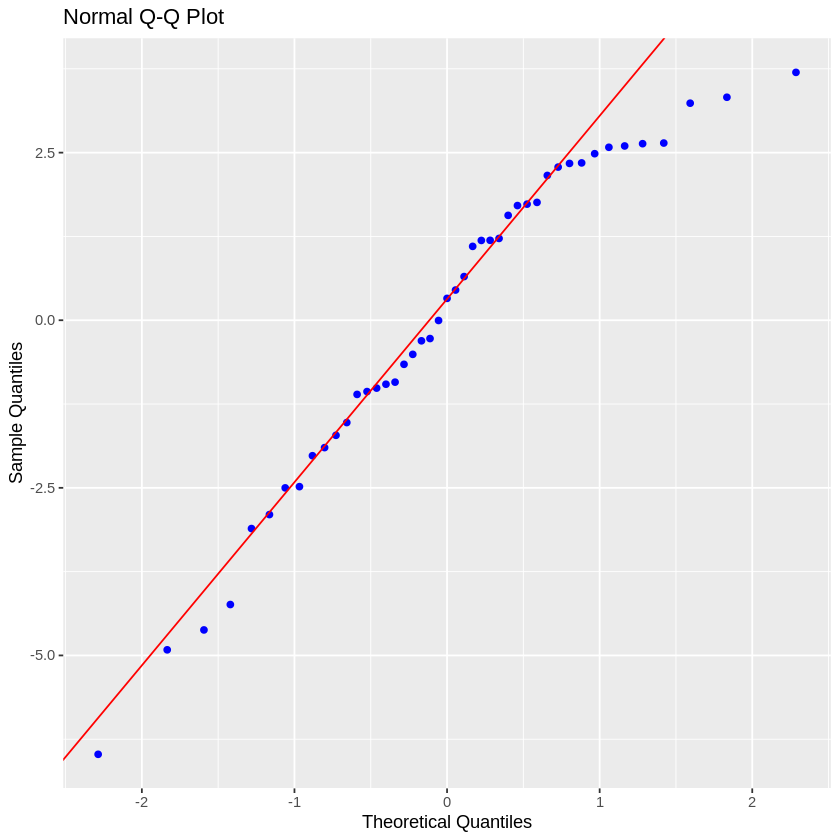


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : gc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)    
 ----------------------------------------
  Variable          chi2     df      p    
 ----------------------------------------
  xvar             1.4523     1    1.0000 
  obt              0.2908     1    1.0000 
  dbt              0.7027     1    1.0000 
  nrt              0.0222     1    1.0000 
  njt              1.3297     1    1.0000 
  stai             0.0795     1    1.0000 
 ----------------------------------------
  simultaneous     7.0959     6    0.3121 
 ----------------------------------------

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
xvar,0.531,1.88
obt,0.777,1.29
dbt,0.815,1.23
nrt,0.663,1.51
njt,0.525,1.90
stai,0.368,2.71


Eigenvalue,Condition Index,intercept,xvar,obt,dbt,nrt,njt,stai
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.71641,1.00,8.78e-05,0.000687,0.000697,0.00101,4.83e-04,0.000915,0.000395
0.13249,7.12,5.15e-04,0.031156,0.011216,0.00365,3.76e-05,0.106274,0.070238
0.06010,10.57,2.18e-03,0.040463,0.061317,0.09327,2.56e-02,0.316347,0.052194
0.03921,13.09,1.86e-04,0.020814,0.100820,0.83401,8.05e-02,0.000721,0.007882
0.02983,15.01,1.37e-03,0.538652,0.339441,0.04351,2.08e-03,0.122780,0.043337
0.01881,18.90,2.21e-04,0.193539,0.447413,0.01690,7.32e-01,0.003436,0.000611
0.00316,46.10,9.95e-01,0.174688,0.039096,0.00765,1.59e-01,0.449527,0.825342


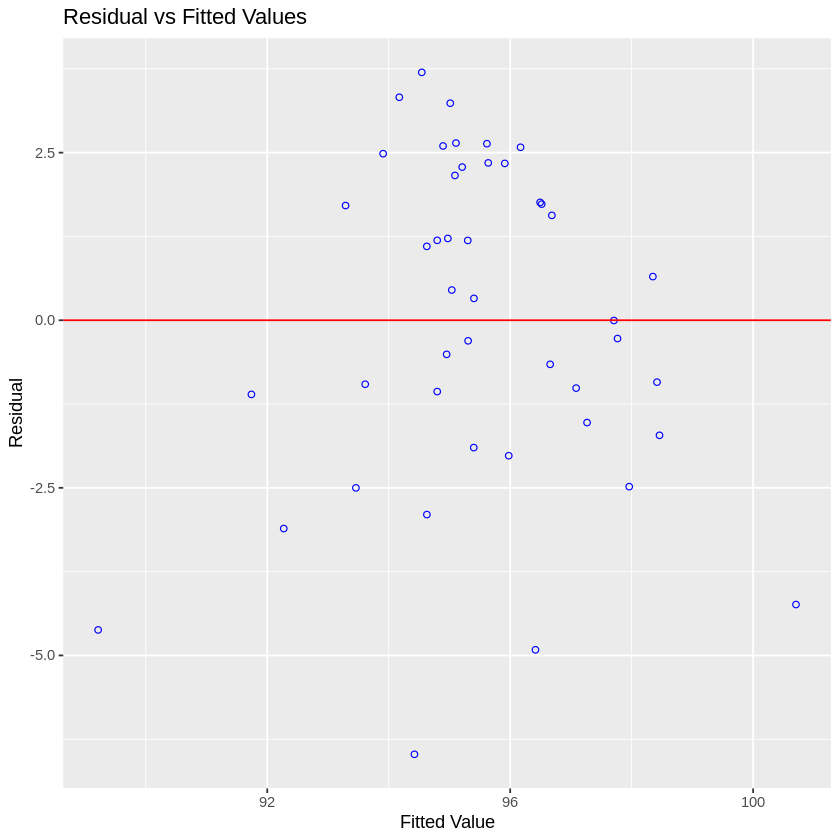

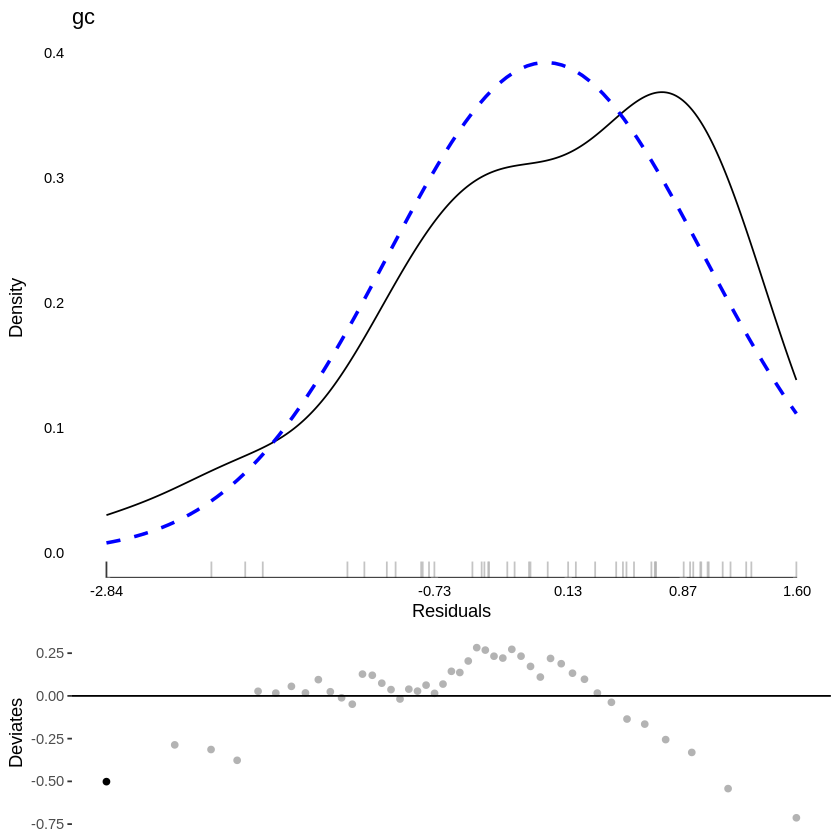

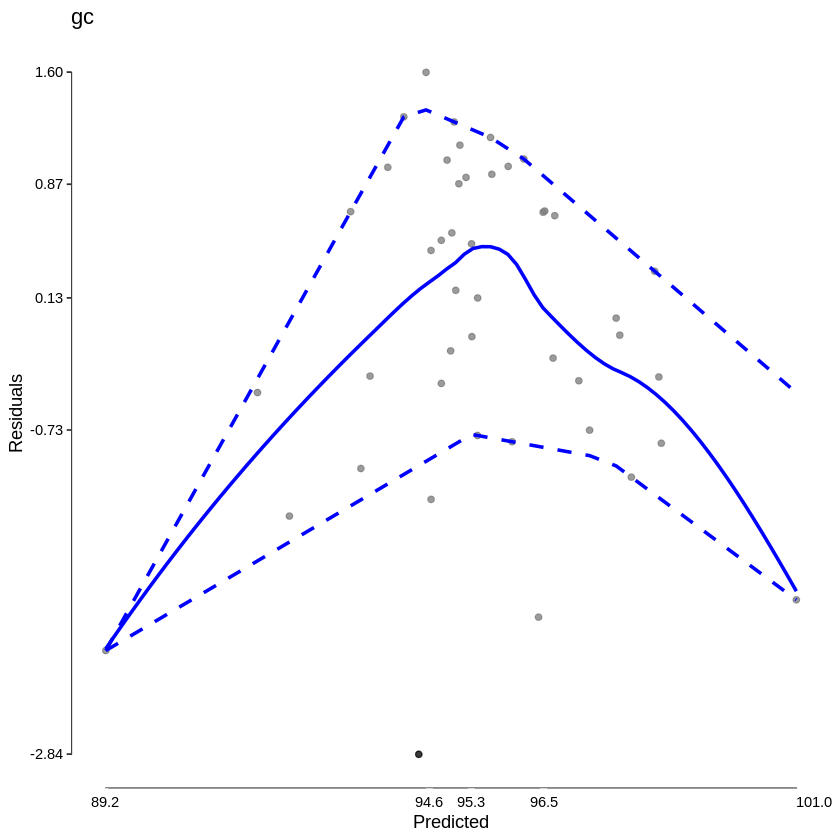

In [26]:
xvar = aat

malt <- lm(gc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

ols_vif_tol(malt)
ols_eigen_cindex(malt)

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

### noGo Accuracy vs Mindfulness Facets (Controlling for other facets and STAI)


Call:
lm(formula = ngc ~ xvar + obt + dbt + nrt + njt + stai)

Residuals:
   Min     1Q Median     3Q    Max 
-36.11  -9.73   1.56  10.16  28.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   70.785     37.844    1.87    0.069 .
xvar           0.102      0.526    0.19    0.847  
obt           -0.358      0.501   -0.71    0.480  
dbt            0.461      0.431    1.07    0.291  
nrt           -0.419      0.742   -0.56    0.576  
njt           -0.416      0.508   -0.82    0.418  
stai           0.132      0.334    0.40    0.694  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16 on 38 degrees of freedom
Multiple R-squared:  0.0884,	Adjusted R-squared:  -0.0555 
F-statistic: 0.614 on 6 and 38 DF,  p-value: 0.718


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk               0.98          0.6185 
Kolmogorov-Smirnov        0.1047         0.6686 
Cramer-von Mises          3.7108         0.0000 
Anderson-Darling          0.2976         0.5745 
-----------------------------------------------

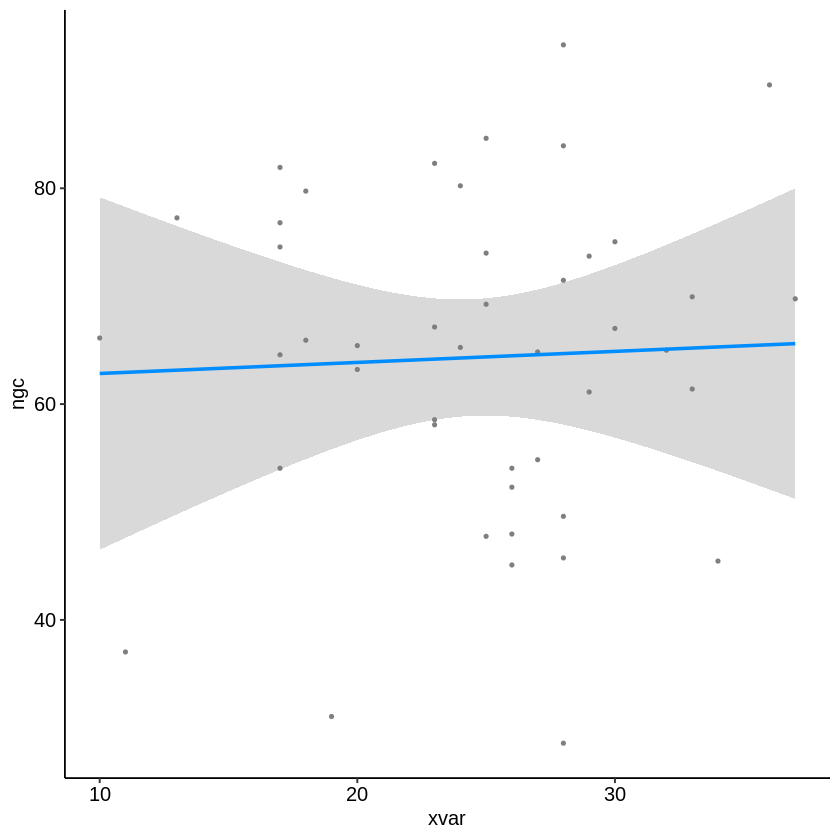

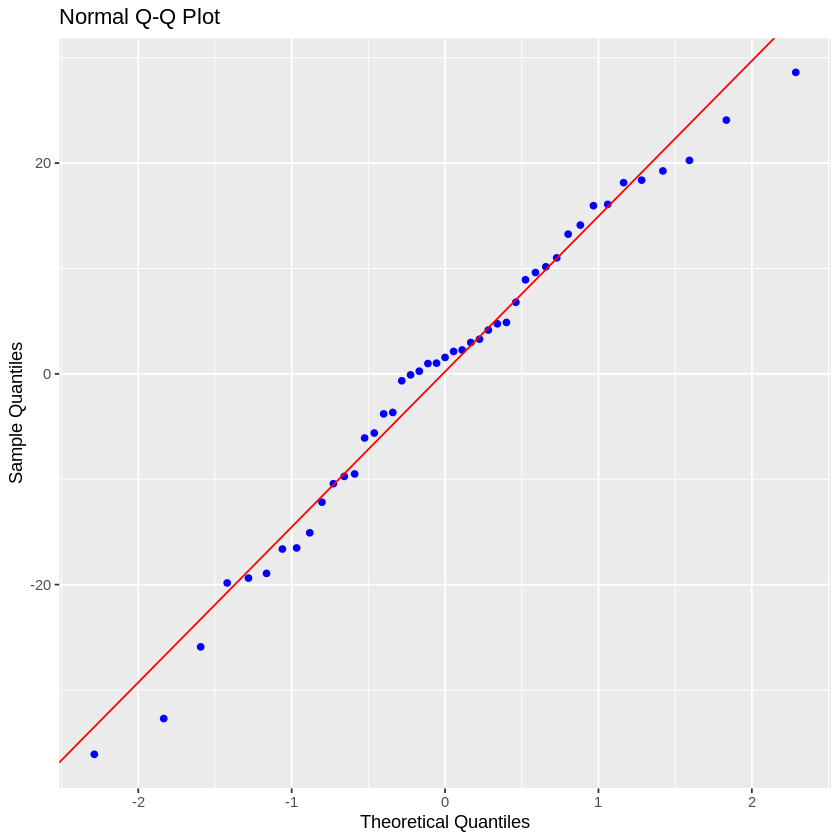


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                 
 ------------------------------------
 Response : ngc 
 Variables: xvar obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  xvar             0.00170     1    1.0000 
  obt              0.51088     1    1.0000 
  dbt              0.69364     1    1.0000 
  nrt              1.49782     1    1.0000 
  njt              0.00085     1    1.0000 
  stai             0.01535     1    1.0000 
 -----------------------------------------
  simultaneous     2.69456     6    0.8461 
 -----------------------------------------

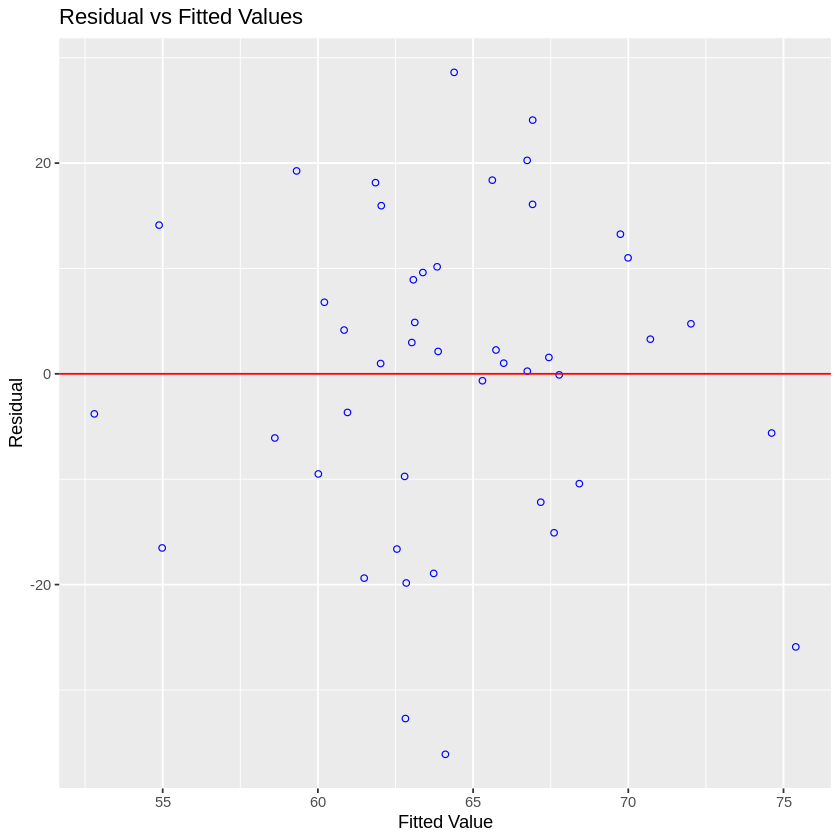

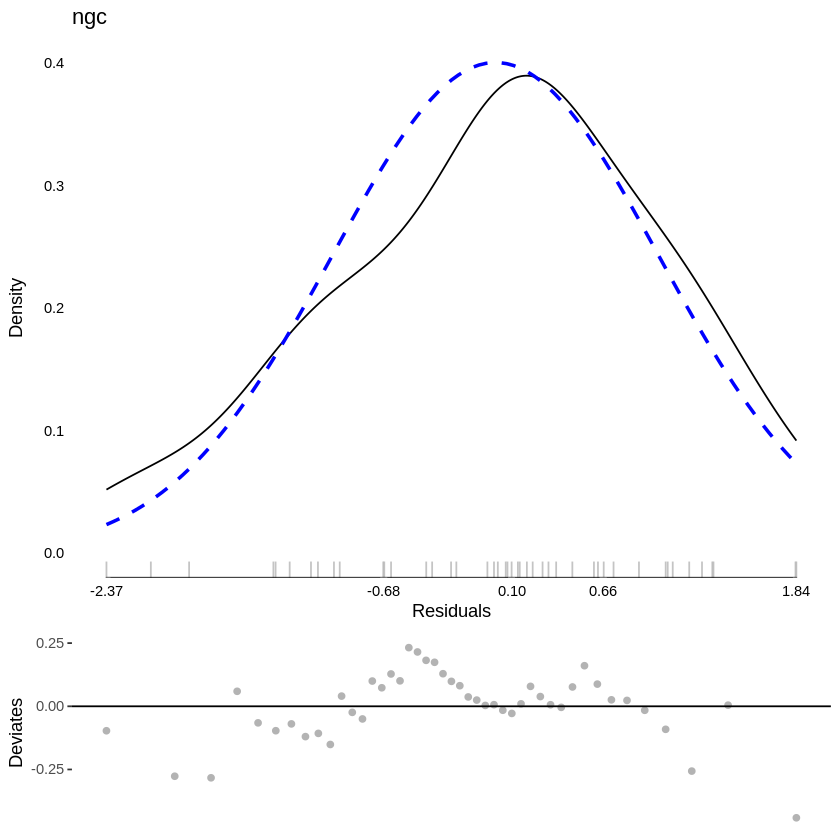

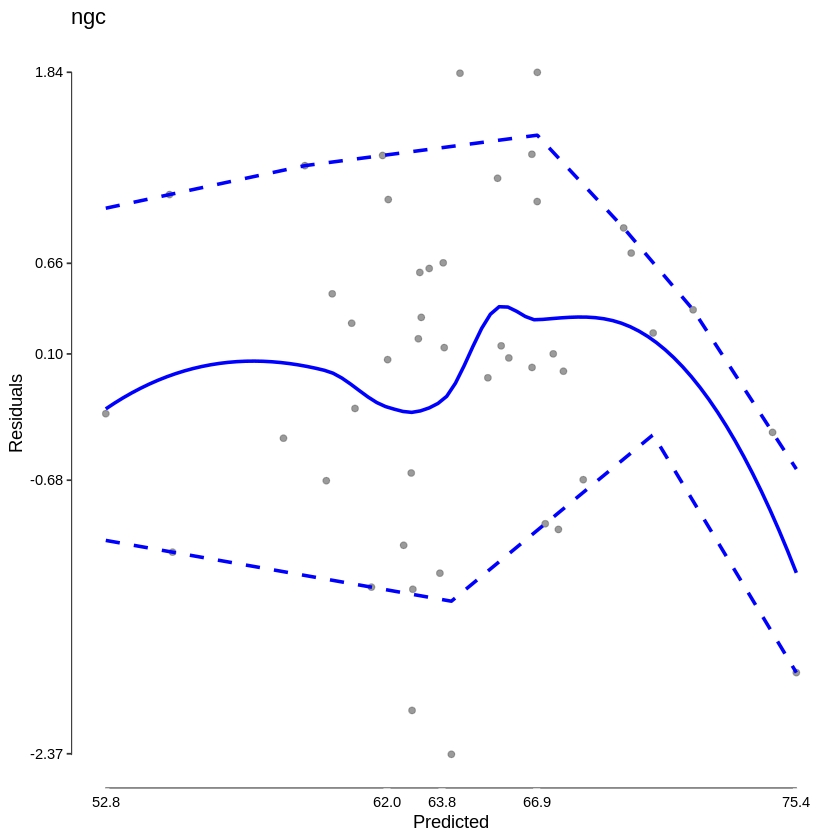

In [27]:
xvar = aat
malt <- lm(ngc ~ xvar + obt + dbt + nrt + njt + stai)

summary(malt)
visreg(malt, xvar = "xvar", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

# Beta Regression

## Controlling for other facets

In [28]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai)
beta_malt <- betareg(fgc ~ obt + aat + dbt + nrt + njt + stai, link = "logit", data = df) # remove precision because non sig
summary(beta_malt)

vif(beta_malt)
which(cooks.distance(beta_malt) > 1)
confint(beta_malt)


Call:
betareg(formula = fgc ~ obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.515 -0.759 -0.155  0.864  2.112 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.69953    1.12113    0.62  0.53266    
obt         -0.05579    0.01653   -3.37  0.00074 ***
aat          0.05393    0.01520    3.55  0.00039 ***
dbt          0.01481    0.01238    1.20  0.23162    
nrt          0.00587    0.02326    0.25  0.80073    
njt          0.01459    0.01510    0.97  0.33382    
stai         0.03506    0.00963    3.64  0.00027 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     91.7       19.7    4.65  3.3e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  114 on 8 Df
Pseudo R-squared: 0.311
Number of 

obt  aat  dbt  nrt  njt stai 
1.29 1.75 1.28 1.55 1.80 2.42

named integer(0)

,2.5 %,97.5 %
(Intercept),-1.49783,2.8969
obt,-0.08820,-0.0234
aat,0.02413,0.0837
dbt,-0.00945,0.0391
nrt,-0.03972,0.0515
njt,-0.01500,0.0442
stai,0.01618,0.0539
(phi),53.09121,130.3596


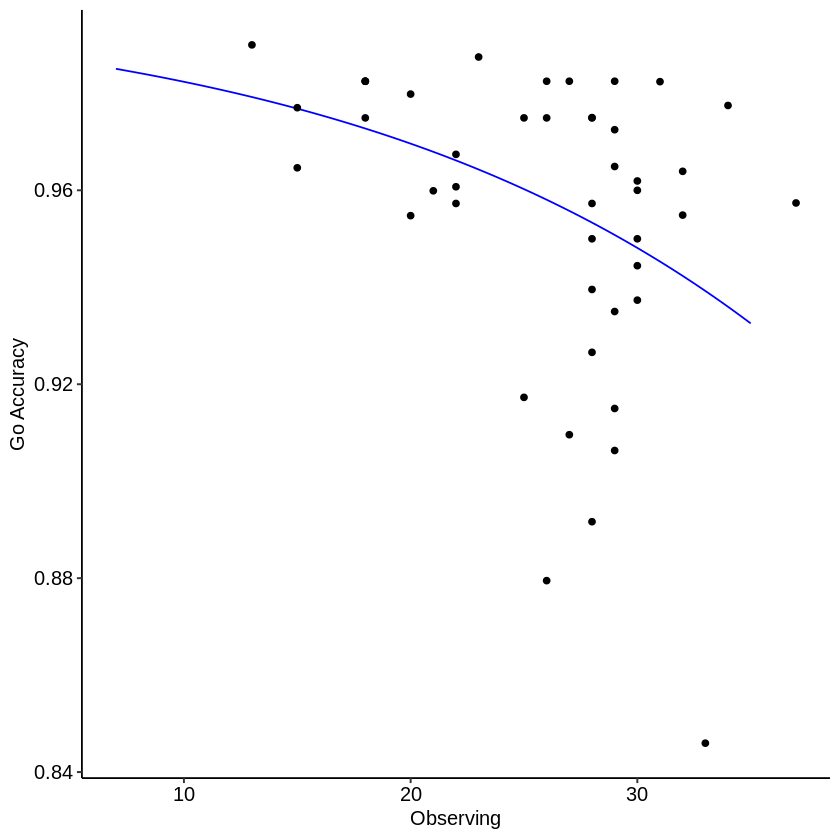

In [29]:
# Create a new data frame for prediction
new_data <- data.frame(
  obt = seq(7, 35, length.out = 100),
  aat = mean(df$aat),
  dbt = mean(df$dbt),
  nrt = mean(df$nrt),
  njt = mean(df$njt),
  stai = mean(df$stai)
)

# Make predictions
new_data$predicted_fgc <- predict(beta_malt, newdata = new_data, type = "response")

# Plot the data with predicted line and actual data points
ggplot() +
  geom_line(data = new_data, aes(x = obt, y = predicted_fgc), color = "blue") +
  geom_point(data = df, aes(x = obt, y = fgc), color = "black") +
  xlab("Observing") +
  ylab("Go Accuracy") + theme_pubr()

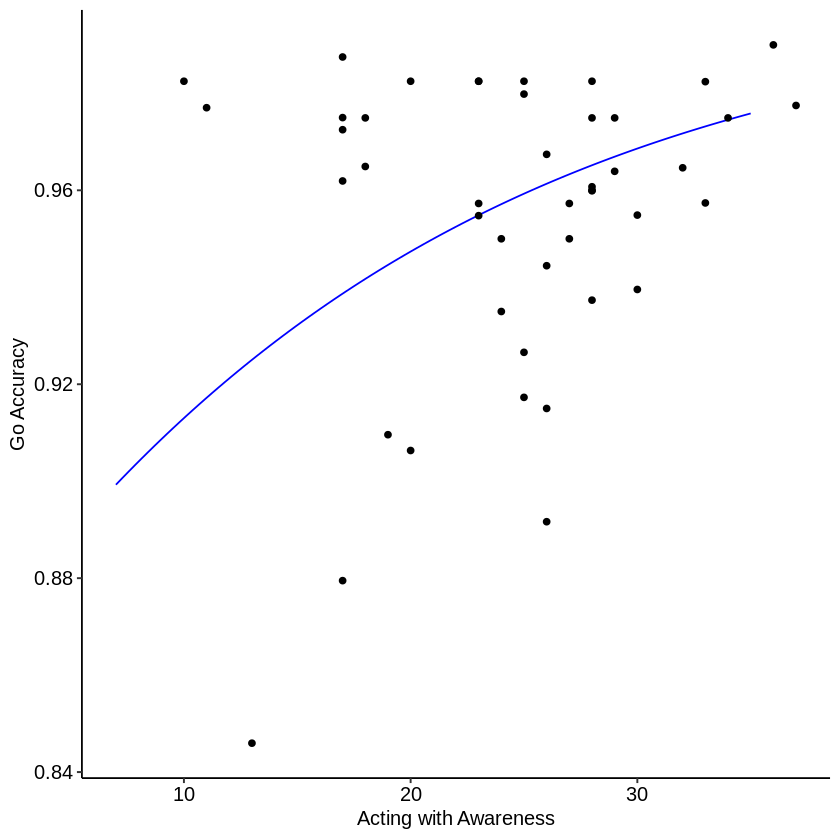

In [30]:
# Create a new data frame for prediction
new_data <- data.frame(
  aat = seq(7, 35, length.out = 100),
  obt = mean(df$obt),
  dbt = mean(df$dbt),
  nrt = mean(df$nrt),
  njt = mean(df$njt),
  stai = mean(df$stai)
)

# Make predictions
new_data$predicted_fgc <- predict(beta_malt, newdata = new_data, type = "response")

# Plot the data with predicted line and actual data points
ggplot() +
  geom_line(data = new_data, aes(x = aat, y = predicted_fgc), color = "blue") +
  geom_point(data = df, aes(x = aat, y = fgc), color = "black") +
  xlab("Acting with Awareness") +
  ylab("Go Accuracy") + theme_pubr()

In [31]:
avg_slopes(beta_malt, variables = "obt")
avg_slopes(beta_malt, variables = "aat")
avg_slopes(beta_malt, variables = "stai")
which(cooks.distance(beta_malt) > 1)

term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
obt,-0.00238,0.00072,-3.31,0.000946,10,-0.00379,-0.00097


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aat,0.0023,0.000662,3.47,0.000511,10.9,0.001,0.0036


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stai,0.0015,0.00042,3.56,0.000371,11.4,0.000672,0.00232


named integer(0)


Call:
betareg(formula = fngc ~ aat + obt + dbt + nrt + njt + stai, link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.343 -0.693  0.014  0.628  2.738 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.05293    1.50330    0.70     0.48
aat          0.00600    0.02080    0.29     0.77
obt         -0.02019    0.02001   -1.01     0.31
dbt          0.01945    0.01700    1.14     0.25
nrt         -0.01922    0.02953   -0.65     0.52
njt         -0.01847    0.02004   -0.92     0.36
stai         0.00477    0.01322    0.36     0.72

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)     9.59       1.93    4.96  7.2e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 23.7 on 8 Df
Pseudo R-squared: 0.0842
Number of iterations: 17 (BFGS) + 2 (Fisher scoring) 

,2.5 %,97.5 %
(Intercept),-1.8935,3.9993
aat,-0.0348,0.0468
obt,-0.0594,0.0190
dbt,-0.0139,0.0528
nrt,-0.0771,0.0387
njt,-0.0577,0.0208
stai,-0.0211,0.0307
(phi),5.7946,13.3760


named integer(0)

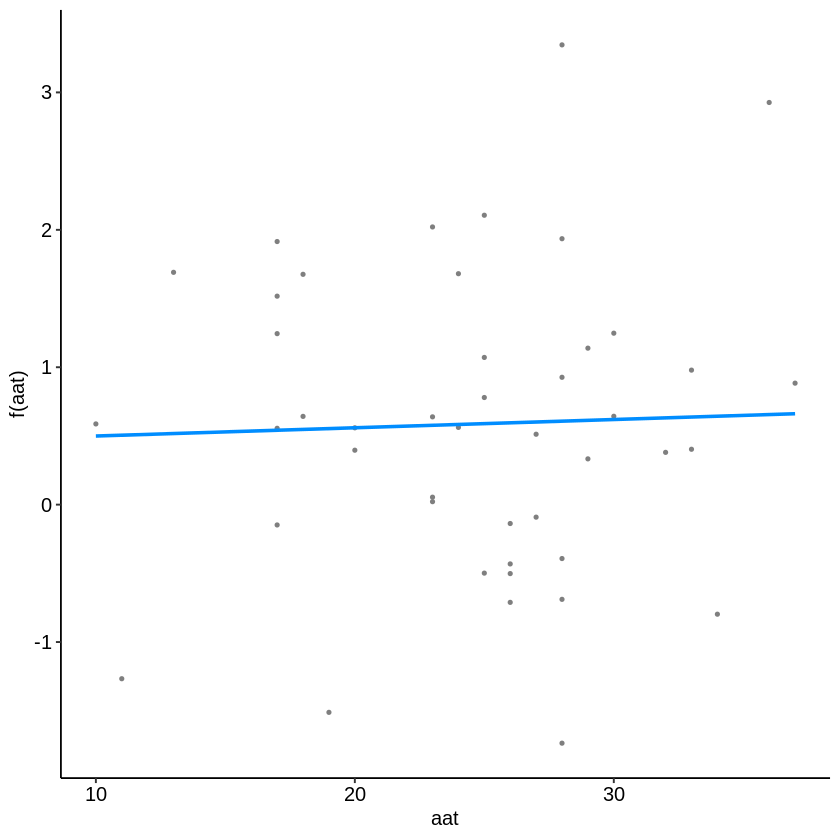

In [32]:
beta_malt <- betareg(fngc ~ aat + obt + dbt + nrt + njt + stai, link = "logit")
summary(beta_malt)

visreg(beta_malt, xvar = "aat", overlay = TRUE, gg = TRUE) + theme_pubr()    
confint(beta_malt)
which(cooks.distance(beta_malt) > 1)

In [33]:
avg_slopes(beta_malt, variables = "obt")
avg_slopes(beta_malt, variables = "aat")
avg_slopes(beta_malt, variables = "stai")

term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
obt,-0.00459,0.00453,-1.01,0.311,1.68,-0.0135,0.00429


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aat,0.00137,0.00473,0.289,0.773,0.372,-0.0079,0.0106


term,estimate,std.error,statistic,p.value,s.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stai,0.00108,0.00301,0.361,0.718,0.478,-0.00481,0.00697


# Bayesian Beta Reg

## Main - Control

In [34]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai)
df <- df[-c(36), ]
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc~obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 44) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.71      1.27    -1.79     3.23 1.00    26820    21408
obt          -0.05      0.02    -0.09    -0.02 1.00    29682    24913
aat           0.06      0.02     0.02     0.09 1.00    27316    22416
dbt           0.01      0.01    -0.02     0.04 1.00    28579    21753
nrt           0.01      0.03    -0.05     0.06 1.00    28680    21498
njt           0.01      0.02    -0.02     0.05 1.00    27864    22479
stai          0.03      0.01     0.01     0.06 1.00    25663    21995

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi    75.95     17.39    45.66   113.59 1.00    25740    21985


Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.05      0.02    -0.08    -0.02          0         0     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.05      0.02    -0.08    -0.02        820         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.06      0.02     0.02     0.09        363         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [35]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai)
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc~obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 45) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.01      1.65    -2.25     4.23 1.00    23909    22248
obt          -0.02      0.02    -0.06     0.02 1.00    30148    24611
aat           0.01      0.02    -0.04     0.05 1.00    27330    24535
dbt           0.02      0.02    -0.02     0.06 1.00    33070    24588
nrt          -0.02      0.03    -0.08     0.05 1.00    28772    23114
njt          -0.02      0.02    -0.06     0.03 1.00    26513    24159
stai          0.01      0.01    -0.02     0.03 1.00    23097    22795

Family Specific Parameters: 
    Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
phi     8.42      1.80     5.31    12.31 1.00    29297    24001

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0    -0.02      0.02    -0.06     0.01        0.2      0.16     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.02      0.02    -0.06     0.01       5.07      0.84     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.01      0.02    -0.03     0.04       1.51       0.6     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

# ERP

In [36]:
erp <- as.data.frame(read_csv("erp.csv"))
nrow(erp)

Rows: 37 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): ID, nGP3, nGP3SME, GP3, GP3SME, dP3, nGN2, nGN2SME, GN2, GN2SME, dN2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 37

In [37]:
test <- db[db[[1]] %in% erp[[1]], ]

obt <- test[["Observing Total"]]
dbt <- test[["Describing Total"]]
aat <- test[["ActAware Total"]]
nrt <- test[["Nonreactivity Total"]]
njt <- test[["Nonjudging Total"]]
stai <- test[["STAI Total"]]
ffmqt <- test[["FFMQ Total"]]

gc <- test[["Go Correct"]]
ngc <- test[["noGo Correct"]]
dgc <- test[["delta Go"]]

fgc <- gc/100
fngc <- ngc/100

nGP3 <- erp[[2]]
GP3 <- erp[[4]]
dP3 <- erp[[6]]

nGN2 <- erp[[7]]
GN2 <- erp[[9]]
dN2 <- erp[[11]]

sme1 <- erp[[3]]
sme2 <- erp[[5]]

[1] 17.1

[1] 5.89

[1] 15.3


	One Sample t-test

data:  dP3
t = 14, df = 36, p-value = 8e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  8.66 11.68
sample estimates:
mean of x 
     10.2 



	Shapiro-Wilk normality test

data:  dP3
W = 0.9, p-value = 0.03


integer(0)

integer(0)


	Wilcoxon signed rank test with continuity correction

data:  dP3
V = 703, p-value = 1e-07
alternative hypothesis: true location is not equal to 0


[1] 37

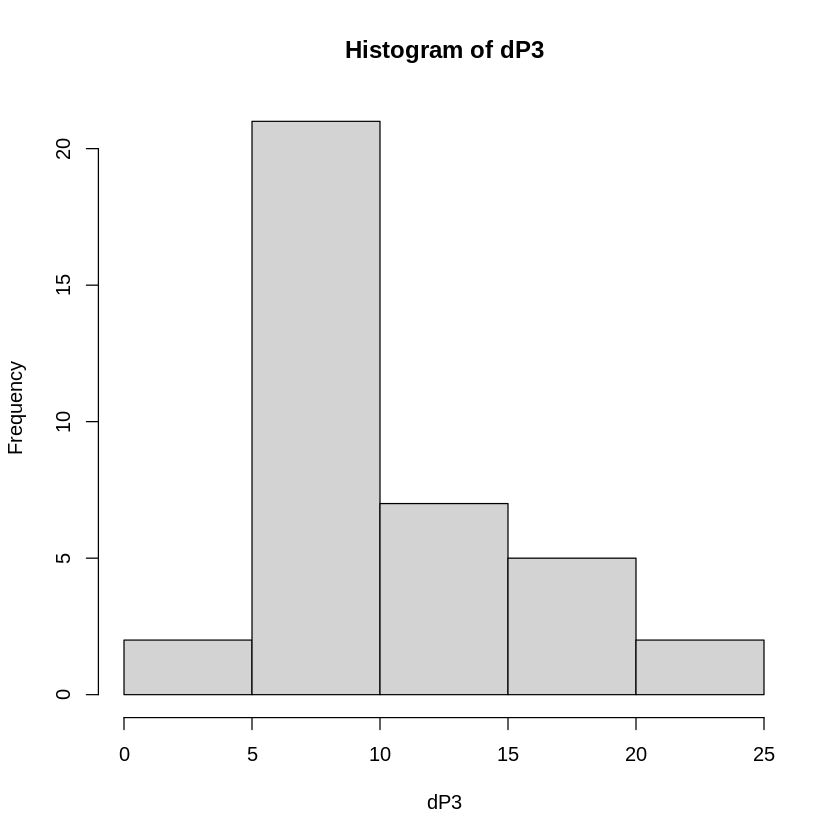

In [38]:
round(mean(nGP3), 2)
round(sd(nGP3), 2)
round(median(nGP3), 2)

t.test(dP3, mu = 0)
shapiro.test(dP3)
hist(dP3)
z <- scale(dP3)
which(z < -3)
which(z > 3)

wilcox.test(dP3, mu = 0, paired = FALSE, exact = FALSE)

length(gc)

### Simple linear and bayesian regression of delta P3 and mindfulness facets controlling for trait anxiety


Call:
lm(formula = dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.222 -2.468 -0.427  2.447  9.591 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 17.73674   11.25821    1.58     0.13  
aat          0.11044    0.16120    0.69     0.50  
obt         -0.11064    0.14839   -0.75     0.46  
dbt          0.08150    0.13142    0.62     0.54  
nrt         -0.47591    0.23331   -2.04     0.05 .
njt         -0.00148    0.15784   -0.01     0.99  
stai         0.01677    0.10236    0.16     0.87  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.43 on 30 degrees of freedom
Multiple R-squared:   0.2,	Adjusted R-squared:  0.04 
F-statistic: 1.25 on 6 and 30 DF,  p-value: 0.31


,2.5 %,97.5 %
(Intercept),-5.256,4.07e+01
aat,-0.219,4.40e-01
obt,-0.414,1.92e-01
dbt,-0.187,3.50e-01
nrt,-0.952,5.76e-04
njt,-0.324,3.21e-01
stai,-0.192,2.26e-01



Call:
lm(formula = dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Standardized Coefficients::
(Intercept)         aat         obt         dbt         nrt         njt 
         NA     0.15219    -0.14093     0.11502    -0.40075    -0.00221 
       stai 
    0.04295 


aat  obt  dbt  nrt  njt stai 
1.85 1.34 1.29 1.45 2.07 2.58

named integer(0)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9693         0.3891 
Kolmogorov-Smirnov        0.108          0.7413 
Cramer-von Mises          3.3366         0.0000 
Anderson-Darling          0.4998         0.1964 
-----------------------------------------------

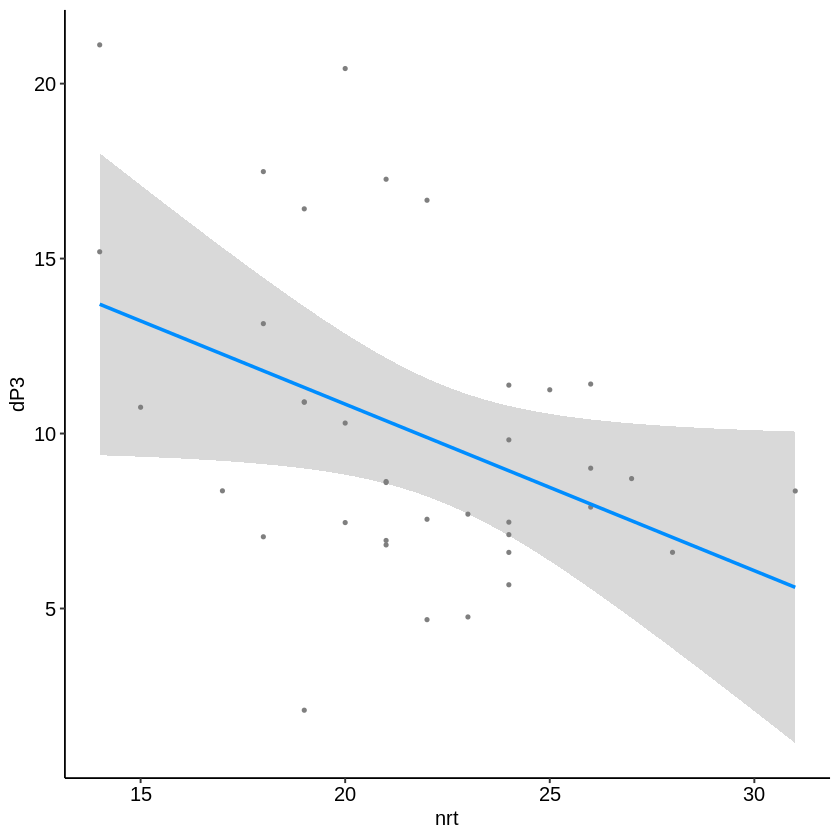

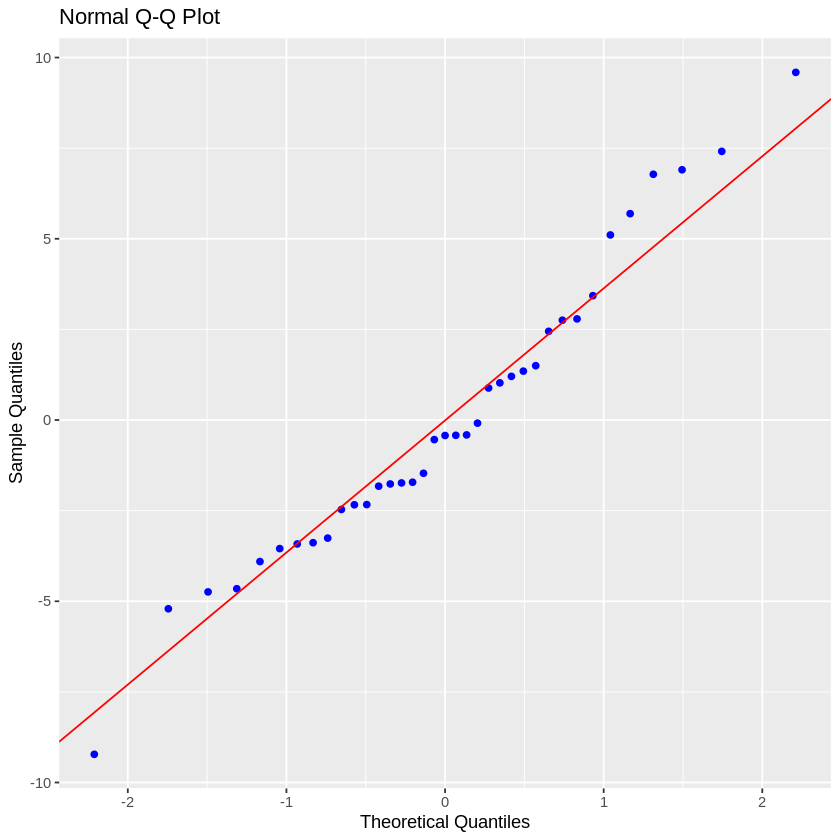


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : dP3 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  aat              0.60642     1    1.0000 
  obt              0.00477     1    1.0000 
  dbt              0.44698     1    1.0000 
  nrt              3.52416     1    0.3629 
  njt              1.37786     1    1.0000 
  stai             0.15422     1    1.0000 
 -----------------------------------------
  simultaneous     8.07580     6    0.2326 
 -----------------------------------------

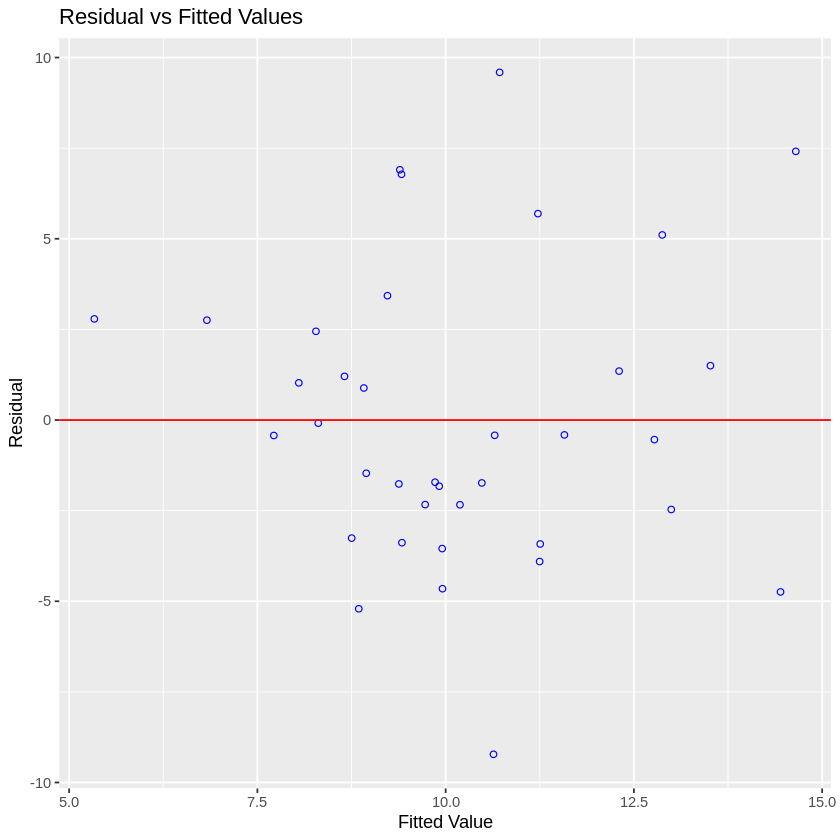

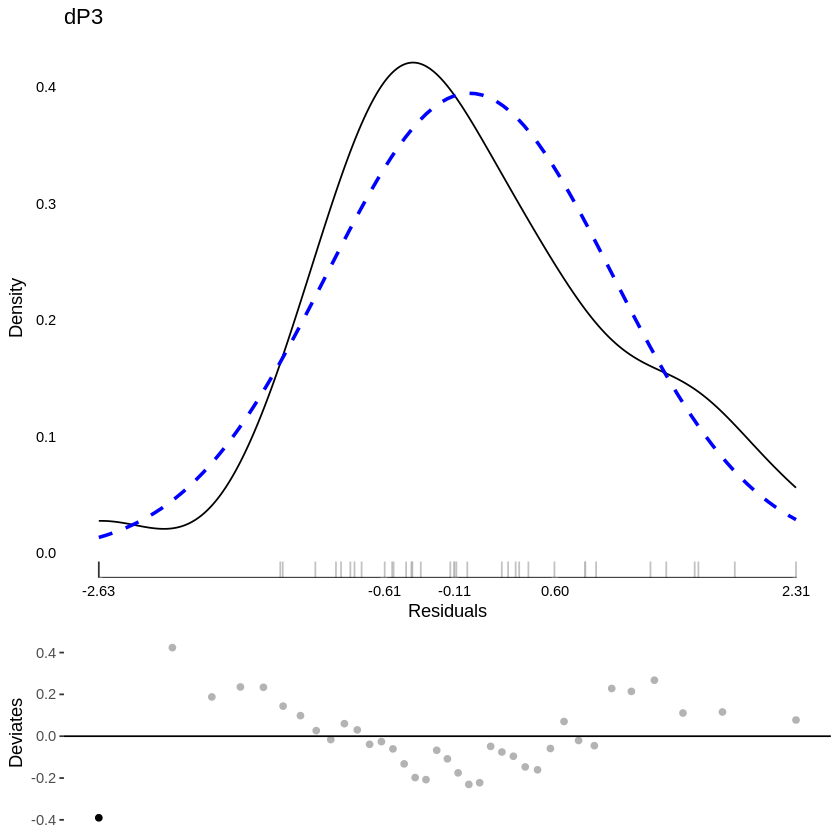

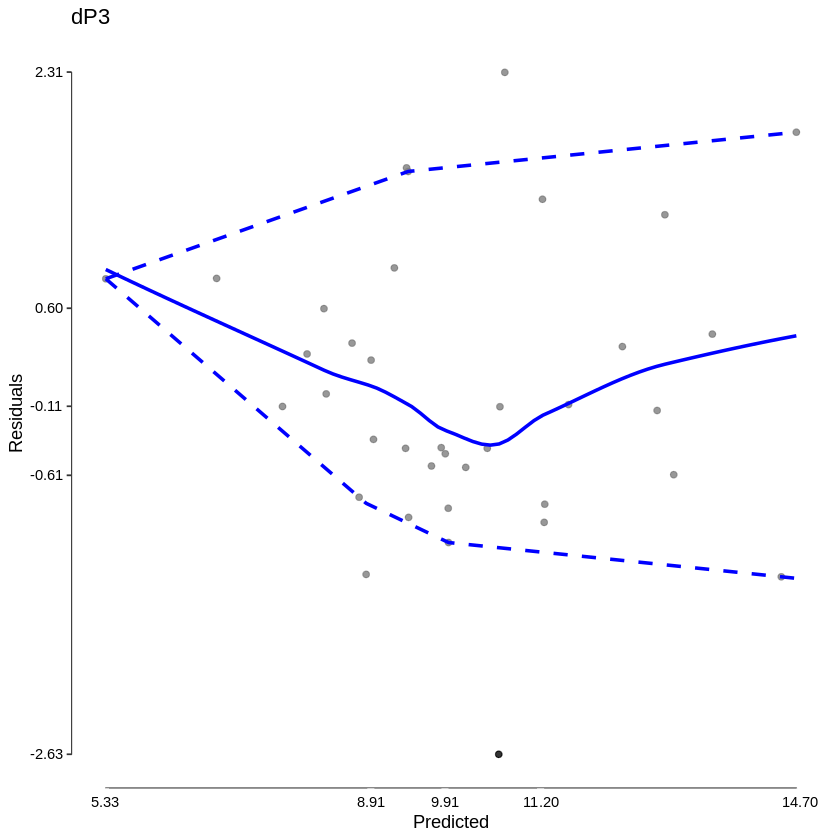

In [39]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(dP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)
confint(malt)
lm.beta(malt)
vif(malt)
which(cooks.distance(malt) > 1)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [40]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = dP3 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.11      0.15    -0.36     0.13       3.66      0.79     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0     0.11      0.16    -0.16     0.37       0.33      0.25     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.45      0.23    -0.83    -0.07       34.4      0.97    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Simple linear and bayesian rergression for GP3 and mindfulness facets controlling for trait anxiety


Call:
lm(formula = GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.51  -1.66  -0.11   2.73   5.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  19.3462     9.3120    2.08    0.046 *
aat          -0.0743     0.1333   -0.56    0.582  
obt           0.0267     0.1227    0.22    0.830  
dbt          -0.0884     0.1087   -0.81    0.423  
nrt          -0.0728     0.1930   -0.38    0.709  
njt          -0.0833     0.1306   -0.64    0.528  
stai         -0.1150     0.0847   -1.36    0.185  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.67 on 30 degrees of freedom
Multiple R-squared:  0.0766,	Adjusted R-squared:  -0.108 
F-statistic: 0.415 on 6 and 30 DF,  p-value: 0.863


,2.5 %,97.5 %
(Intercept),0.329,38.3638
aat,-0.347,0.1980
obt,-0.224,0.2773
dbt,-0.310,0.1336
nrt,-0.467,0.3214
njt,-0.350,0.1833
stai,-0.288,0.0579



Call:
lm(formula = GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)

Standardized Coefficients::
(Intercept)         aat         obt         dbt         nrt         njt 
         NA     -0.1329      0.0441     -0.1620     -0.0796     -0.1613 
       stai 
    -0.3825 


aat  obt  dbt  nrt  njt stai 
1.85 1.34 1.29 1.45 2.07 2.58

named integer(0)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9594         0.1934 
Kolmogorov-Smirnov        0.0906         0.8948 
Cramer-von Mises          3.0324         0.0000 
Anderson-Darling          0.4142         0.3196 
-----------------------------------------------

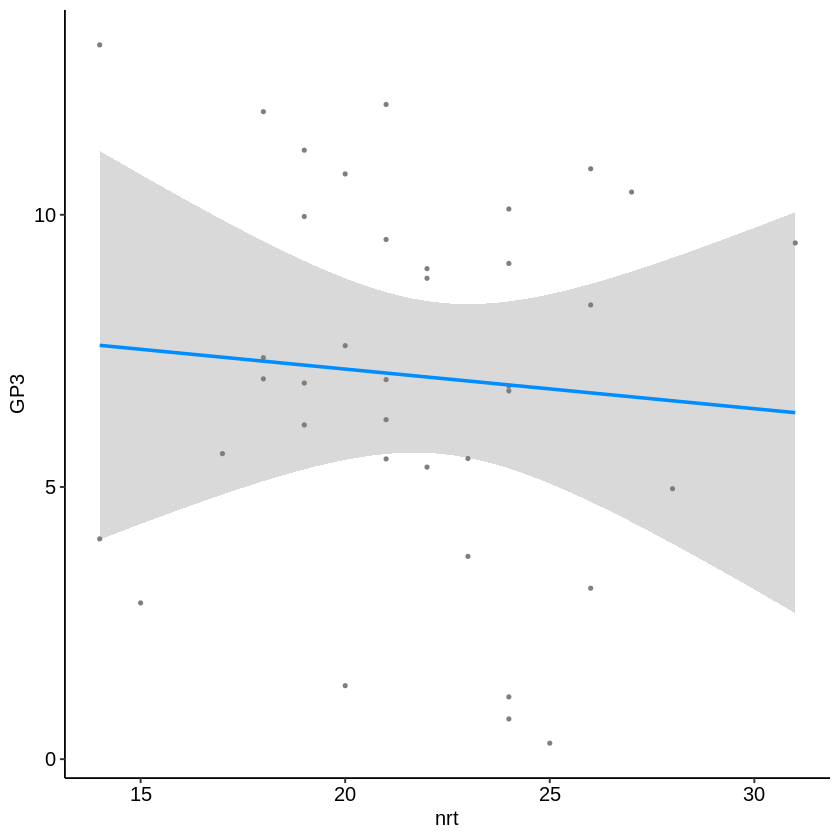

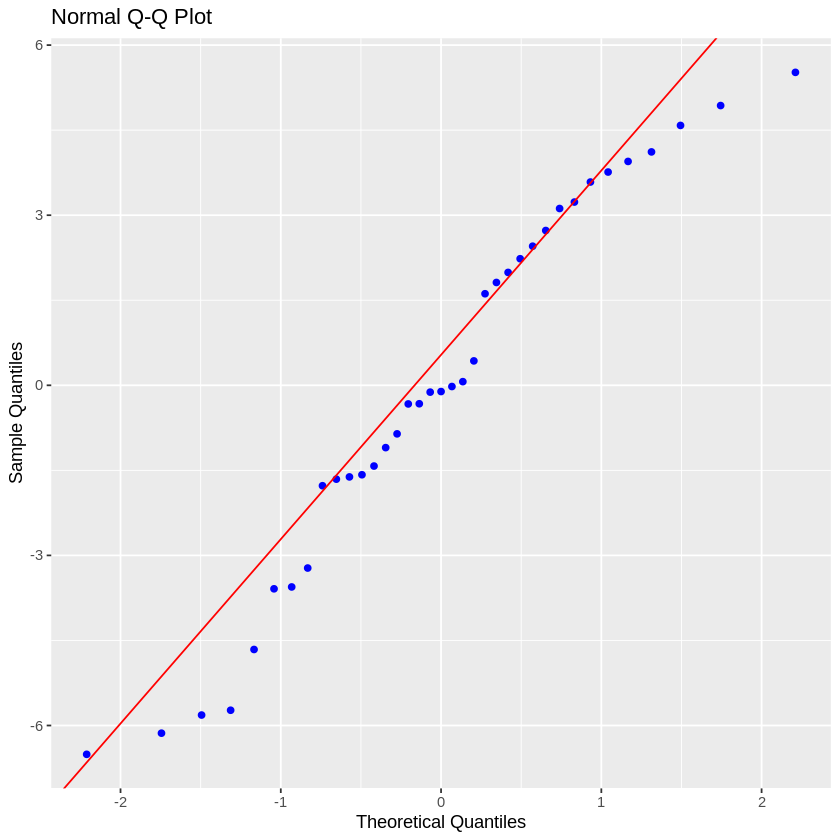


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : GP3 
 Variables: aat obt dbt nrt njt stai 

     Test Summary (Bonferroni p values)     
 -----------------------------------------
  Variable          chi2      df      p    
 -----------------------------------------
  aat              1.94584     1    0.9782 
  obt              0.17786     1    1.0000 
  dbt              0.09297     1    1.0000 
  nrt              0.00712     1    1.0000 
  njt              0.26599     1    1.0000 
  stai             1.04798     1    1.0000 
 -----------------------------------------
  simultaneous     2.86973     6    0.8250 
 -----------------------------------------

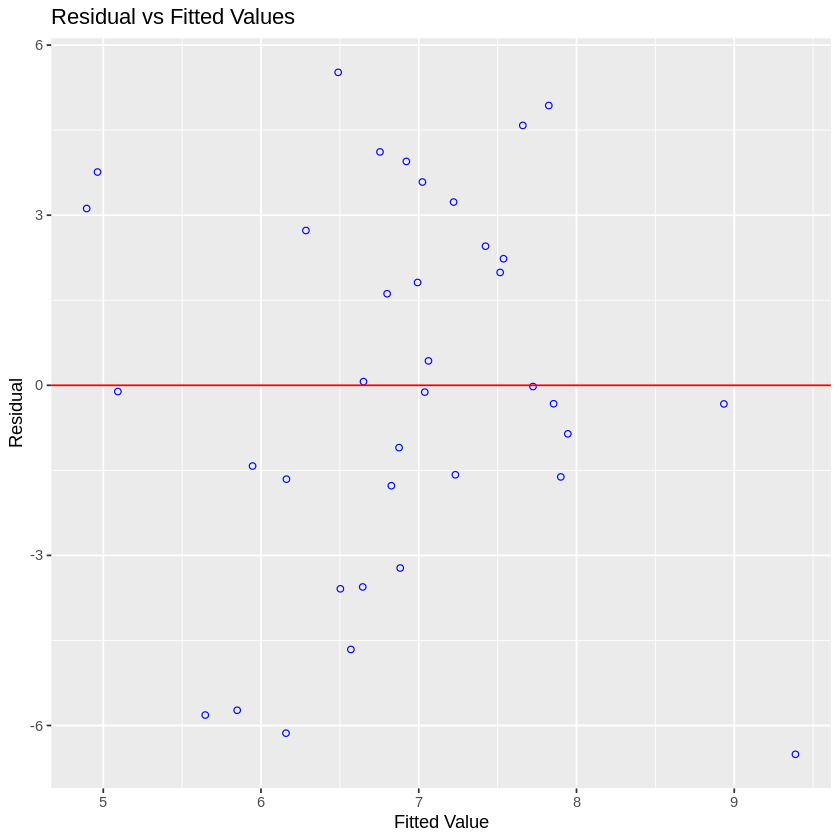

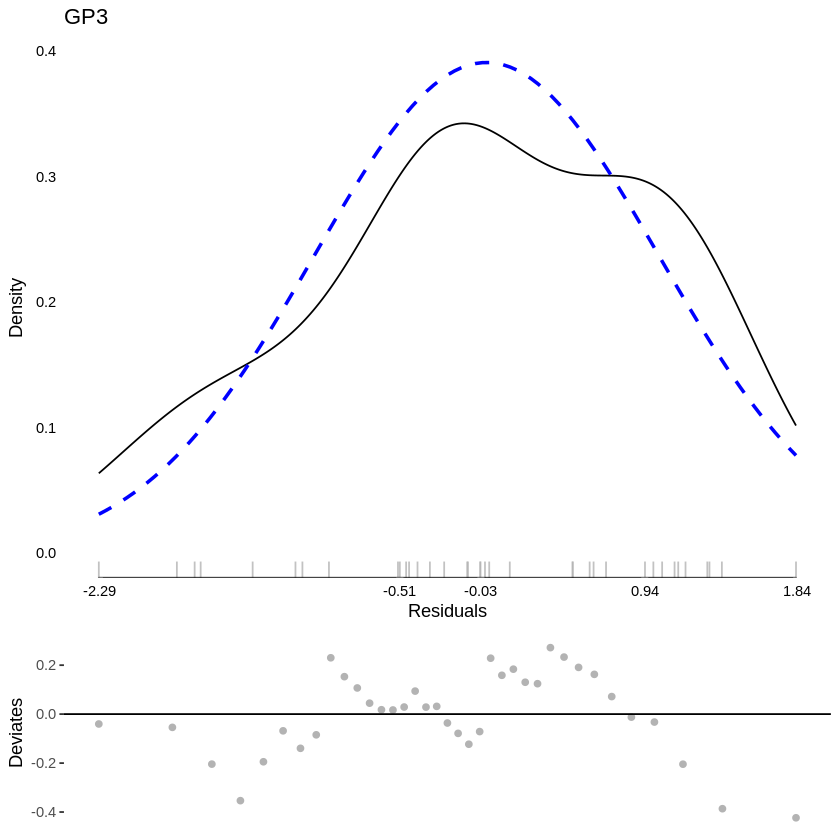

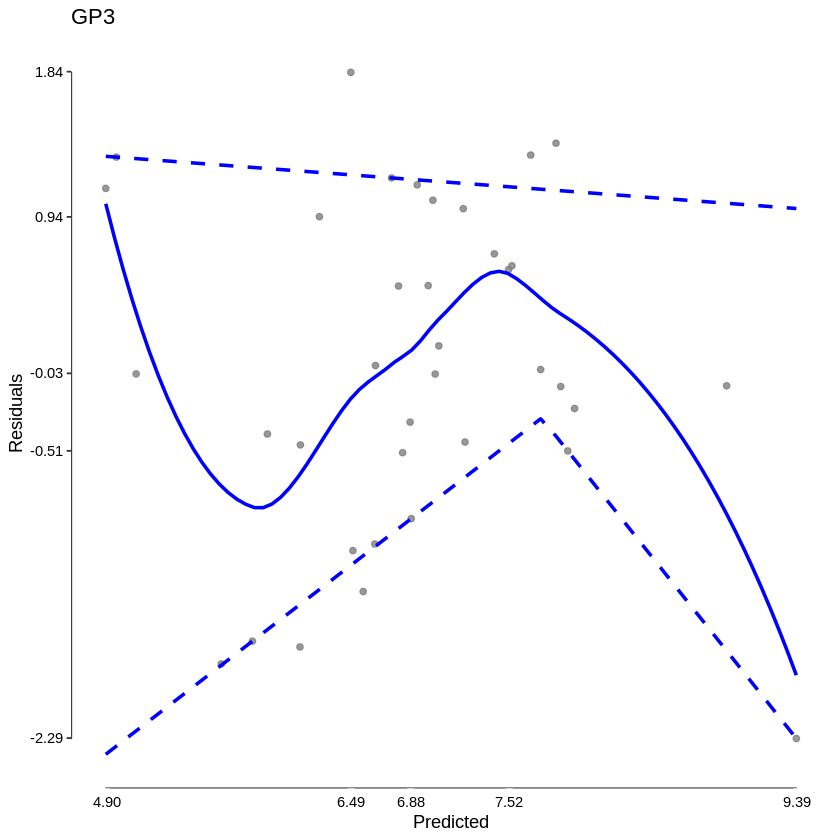

In [41]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

malt <- lm(GP3 ~ aat + obt + dbt + nrt + njt + stai, data = df)
summary(malt)
confint(malt)
lm.beta(malt)
vif(malt)
which(cooks.distance(malt) > 1)

visreg(malt, xvar = "nrt", overlay = TRUE, gg = TRUE) + theme_pubr()

ols_test_normality(malt)
ols_plot_resid_qq(malt)
ols_plot_resid_fit(malt)
ols_test_breusch_pagan(malt, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')

md = modelDiagnostics(malt, ev.perc = .005)
plot(md)

In [42]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = GP3 ~ obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 prior = priors,
                 sample_prior = "yes",
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="nrt < 0")

Compiling Stan program...

Start sampling



Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0     0.02      0.12    -0.18     0.23       0.73      0.42     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.07      0.14    -0.29     0.15       2.48      0.71     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (nrt) < 0    -0.07      0.19    -0.38     0.25       1.78      0.64     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of delta P3 * Observing and no-Go Accuracy

named integer(0)


Call:
betareg(formula = fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.781 -0.723 -0.175  0.783  3.040 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  6.31998    2.27057    2.78   0.0054 **
dP3         -0.42726    0.13869   -3.08   0.0021 **
obt         -0.18001    0.06135   -2.93   0.0033 **
aat          0.02579    0.02106    1.22   0.2207   
dbt          0.01490    0.01669    0.89   0.3722   
nrt         -0.06739    0.03276   -2.06   0.0397 * 
njt         -0.02412    0.02040   -1.18   0.2371   
stai         0.00428    0.01308    0.33   0.7432   
dP3:obt      0.01591    0.00533    2.98   0.0028 **

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    13.11       2.95    4.44    9e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Typ

,2.5 %,97.5 %
(Intercept),1.86975,10.77022
dP3,-0.69909,-0.15543
obt,-0.30026,-0.05976
aat,-0.01549,0.06708
dbt,-0.01782,0.04761
nrt,-0.13160,-0.00317
njt,-0.06411,0.01587
stai,-0.02134,0.02991
dP3:obt,0.00546,0.02635
(phi),7.32225,18.90154


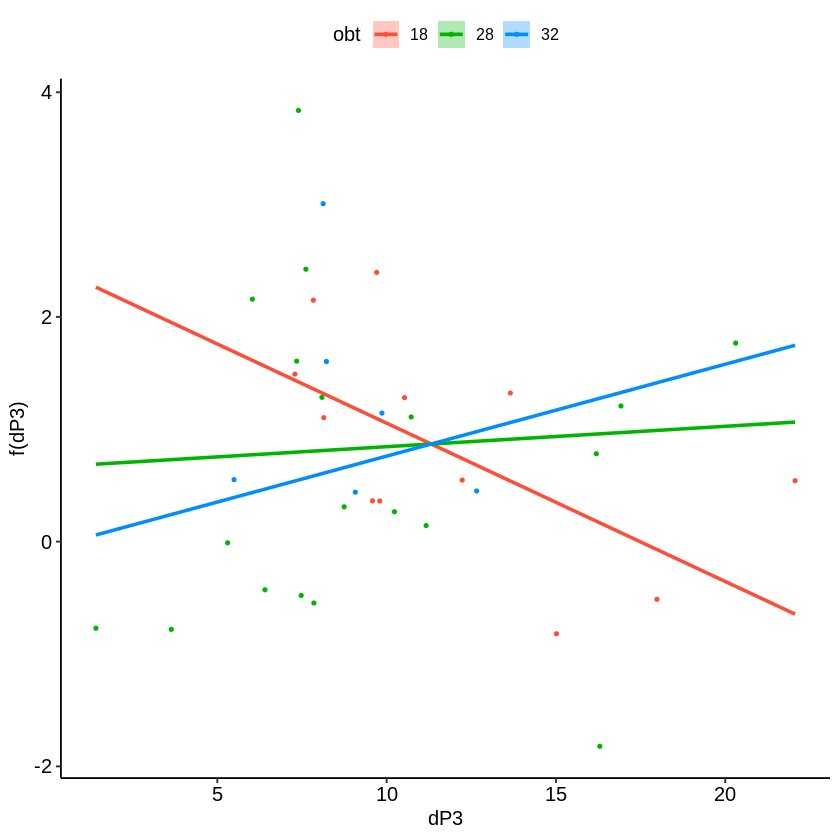

In [55]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

beta_malt <- betareg(fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")

which(cooks.distance(beta_malt) > 1)
summary(beta_malt)
confint(beta_malt)

visreg(beta_malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

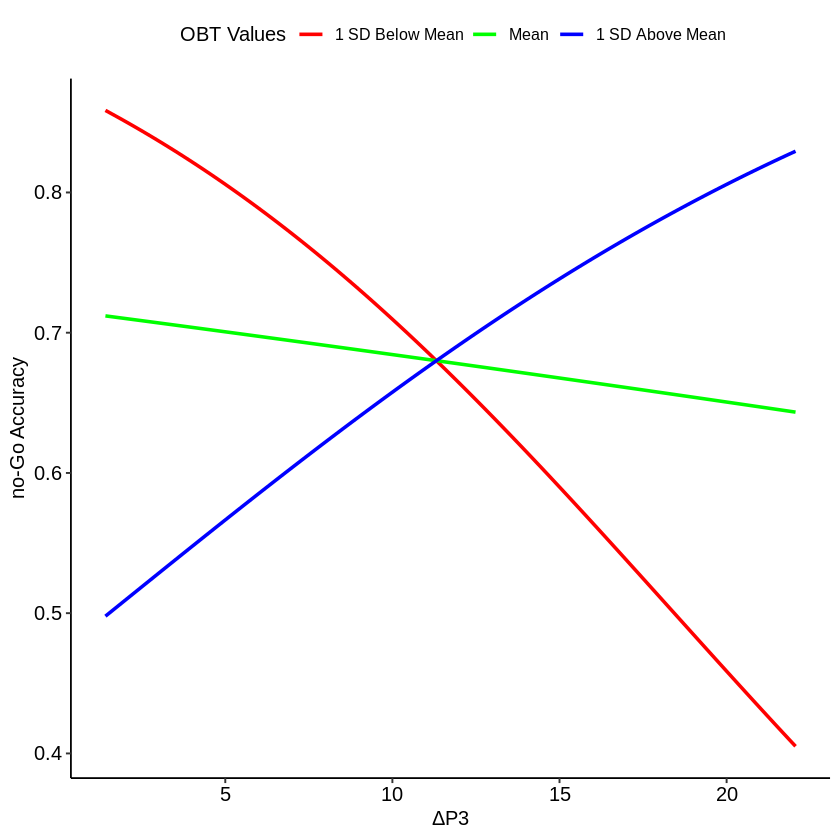

In [64]:
# Create a data grid for 'dP3' for each specific value of 'obt'
datagrid <- expand.grid(
  dP3 = seq(min(df$dP3), max(df$dP3), length.out = 100),
  obt = c(20.2, 25.9, 31.7),
  aat = mean(df$aat),
  dbt = mean(df$dbt),
  nrt = mean(df$nrt),
  njt = mean(df$njt),
  stai = mean(df$stai)
)

# Generate predictions
predictions <- predict(beta_malt, newdata = datagrid, type = "response")

# Create a data frame for plotting
plot_data <- data.frame(
  dP3 = datagrid$dP3,
  obt = datagrid$obt,
  estimate = predictions
)

# Define custom colors and labels for the specific obt values
custom_colors <- c("20.2" = "red", "25.9" = "green", "31.7" = "blue")
custom_labels <- c("20.2" = "1 SD Below Mean", "25.9" = "Mean", "31.7" = "1 SD Above Mean")

# Plot using ggplot2
library(ggplot2)
ggplot(plot_data, aes(x = dP3, y = estimate, color = as.factor(obt))) + 
  geom_line(size = 1) +
  scale_color_manual(values = custom_colors, labels = custom_labels, name = "OBT Values") +
  labs(x = "ΔP3", 
       y = "no-Go Accuracy") +
  theme_pubr()

In [45]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dP3 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dP3:obt > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dP3 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     6.19      2.55     1.15    11.20 1.00    14840    18459
dP3          -0.42      0.16    -0.73    -0.11 1.00    12277    15970
obt          -0.18      0.07    -0.31    -0.04 1.00    12581    17733
aat           0.03      0.03    -0.02     0.08 1.00    22389    21372
dbt           0.02      0.02    -0.02     0.06 1.00    28453    23164
nrt          -0.07      0.04    -0.14     0.01 1.00    26746    21972
njt          -0.02      0.02    -0.07     0.03 1.00    23028    21833
stai          0.00      0.02    -0.03     0.03 1.00    21765    21177
dP3:obt       0.02      0.01     0.00     0.03 1.00    12315    16250

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dP3) < 0    -0.42      0.16    -0.68    -0.16        202         1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) < 0    -0.18      0.07    -0.29    -0.06        178      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dP3:obt) > 0     0.02      0.01     0.01     0.03        160      0.99    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [46]:
library(emmeans)
zvals <- c(mean(df$obt) - sd(df$obt), mean(df$obt), mean(df$obt) + sd(df$obt))
emtrends(beta_malt, specs = "obt", var = "dP3", at = list(obt = zvals))

emtrends(beta_malt, specs = "obt", var = "dP3", at = list(obt = zvals)) |> test()

  obt dP3.trend      SE  df asymp.LCL asymp.UCL
 20.2  -0.02206 0.00727 Inf   -0.0363   -0.0078
 25.9  -0.00314 0.00501 Inf   -0.0130    0.0067
 31.7   0.01730 0.00878 Inf    0.0001    0.0345

Confidence level used: 0.95 

,obt,dP3.trend,SE,df,z.ratio,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.2,-0.02206,0.00727,Inf,-3.036,0.0024
2,25.9,-0.00314,0.00501,Inf,-0.627,0.5308
3,31.7,0.01730,0.00878,Inf,1.970,0.0488


### Beta regression of Go P3 * Observing and Go Accuracy


Call:
betareg(formula = fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.152 -0.702 -0.108  0.809  2.326 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -3.89e-01   1.52e+00   -0.26    0.798  
GP3          1.99e-01   1.07e-01    1.86    0.063 .
obt          2.58e-02   3.41e-02    0.76    0.449  
aat          3.43e-02   1.94e-02    1.77    0.076 .
dbt          4.18e-04   1.54e-02    0.03    0.978  
nrt          2.59e-05   2.50e-02    0.00    0.999  
njt          3.56e-02   2.03e-02    1.75    0.081 .
stai         2.81e-02   1.17e-02    2.41    0.016 *
GP3:obt     -7.89e-03   4.17e-03   -1.89    0.058 .

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    129.2       31.4    4.12  3.8e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type

named integer(0)

,2.5 %,97.5 %
(Intercept),-3.37423,2.60e+00
GP3,-0.01115,4.09e-01
obt,-0.04108,9.28e-02
aat,-0.00363,7.23e-02
dbt,-0.02975,3.06e-02
nrt,-0.04905,4.91e-02
njt,-0.00432,7.54e-02
stai,0.00528,5.10e-02
GP3:obt,-0.01606,2.74e-04
(phi),67.73279,1.91e+02


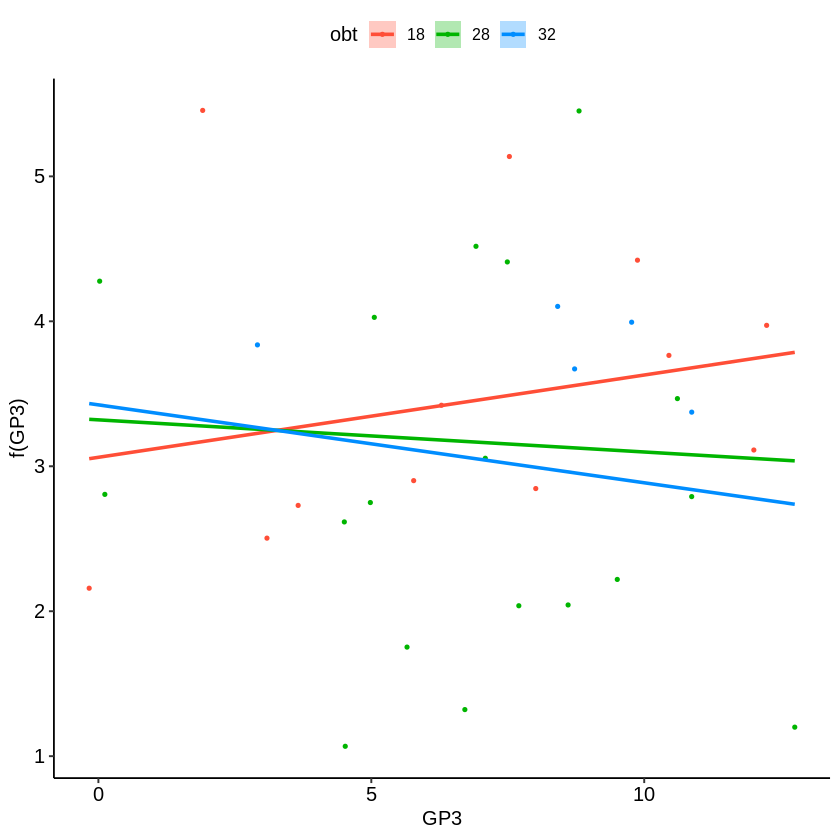

In [47]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34, 36), ]

beta_malt <- betareg(fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)
which(cooks.distance(beta_malt) > 1)
confint(beta_malt)

visreg(beta_malt, xvar = "GP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

In [48]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34, 36), ]

priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GP3 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="obt > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GP3:obt < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GP3 * obt + aat + dbt + nrt + njt + stai 
   Data: df (Number of observations: 35) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.29      1.92    -3.99     3.53 1.00    18855    19618
GP3           0.19      0.13    -0.08     0.44 1.00    14965    18008
obt           0.02      0.04    -0.07     0.10 1.00    15680    19146
aat           0.04      0.02    -0.01     0.08 1.00    25086    21818
dbt           0.00      0.02    -0.04     0.04 1.00    26003    20797
nrt           0.00      0.03    -0.06     0.06 1.00    30844    23122
njt           0.03      0.02    -0.01     0.08 1.00    22267    21476
stai          0.03      0.01    -0.00     0.06 1.00    20720    20725
GP3:obt      -0.01      0.01    -0.02     0.00 1.00    14830    17499

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GP3) > 0     0.19      0.13    -0.03      0.4       11.5      0.92     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (obt) > 0     0.02      0.04    -0.05     0.09       2.32       0.7     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GP3:obt) < 0    -0.01      0.01    -0.02        0       12.8      0.93     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

In [49]:
library(emmeans)
zvals <- c(mean(df$obt) - sd(df$obt), mean(df$obt), mean(df$obt) + sd(df$obt))
emtrends(beta_malt, specs = "obt", var = "GP3", at = list(obt = zvals))

emtrends(beta_malt, specs = "obt", var = "GP3", at = list(obt = zvals)) |> test()

  obt GP3.trend       SE  df asymp.LCL asymp.UCL
 19.9  0.001233 0.000969 Inf  -0.00067  0.003133
 25.7 -0.000152 0.000891 Inf  -0.00190  0.001594
 31.6 -0.002041 0.001491 Inf  -0.00496  0.000881

Confidence level used: 0.95 

,obt,GP3.trend,SE,df,z.ratio,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19.9,0.001233,0.000969,Inf,1.27,0.203
2,25.7,-0.000152,0.000891,Inf,-0.17,0.865
3,31.5,-0.002041,0.001491,Inf,-1.37,0.171


### Beta regression of delta P3 * Acting with Awareness and no-Go Accuracy


Call:
betareg(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.464 -0.766 -0.117  0.702  2.825 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.687085   2.227523    1.21     0.23
dP3         -0.122539   0.120379   -1.02     0.31
aat         -0.032304   0.055835   -0.58     0.56
obt         -0.012930   0.021227   -0.61     0.54
dbt          0.022491   0.018170    1.24     0.22
nrt         -0.040753   0.034401   -1.18     0.24
njt         -0.017679   0.024115   -0.73     0.46
stai        -0.000679   0.014186   -0.05     0.96
dP3:aat      0.004263   0.004890    0.87     0.38

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    10.69       2.39    4.47  7.8e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (

named integer(0)


Call:
betareg(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-2.464 -0.766 -0.117  0.702  2.825 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.687085   2.227523    1.21     0.23
dP3         -0.122539   0.120379   -1.02     0.31
aat         -0.032304   0.055835   -0.58     0.56
obt         -0.012930   0.021227   -0.61     0.54
dbt          0.022491   0.018170    1.24     0.22
nrt         -0.040753   0.034401   -1.18     0.24
njt         -0.017679   0.024115   -0.73     0.46
stai        -0.000679   0.014186   -0.05     0.96
dP3:aat      0.004263   0.004890    0.87     0.38

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    10.69       2.39    4.47  7.8e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (

,2.5 %,97.5 %
(Intercept),-1.67878,7.0530
dP3,-0.35848,0.1134
aat,-0.14174,0.0771
obt,-0.05453,0.0287
dbt,-0.01312,0.0581
nrt,-0.10818,0.0267
njt,-0.06494,0.0296
stai,-0.02848,0.0271
dP3:aat,-0.00532,0.0138
(phi),6.00265,15.3721


named integer(0)

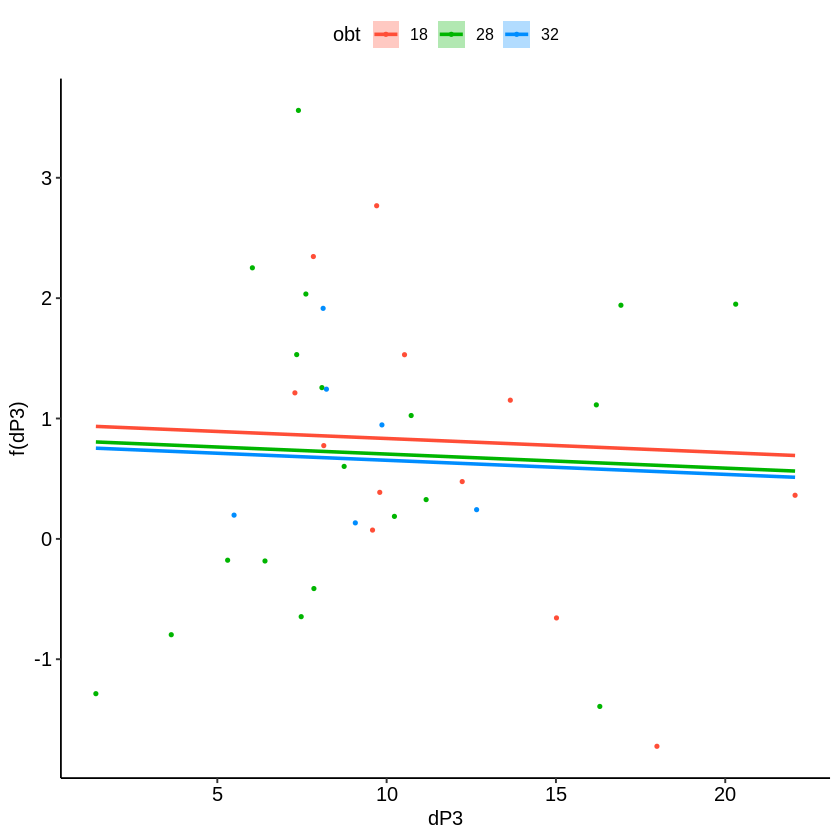

In [50]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)

beta_malt <- betareg(fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)
which(cooks.distance(beta_malt) > 1)
summary(beta_malt)
confint(beta_malt)

visreg(beta_malt, xvar = "dP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [51]:
priors <- c(set_prior("student_t(3, 0, 2.5)", class = "Intercept"),
            set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="dP3 < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat < 0")
brms::hypothesis(bayes_malt_h1, hypothesis="dP3:aat > 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fngc ~ dP3 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 37) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     2.79      2.59    -2.30     7.94 1.00    13392    17592
dP3          -0.14      0.15    -0.45     0.16 1.00    11781    16438
aat          -0.04      0.07    -0.18     0.09 1.00    11853    16663
obt          -0.01      0.03    -0.06     0.03 1.00    21040    21580
dbt           0.02      0.02    -0.02     0.07 1.00    29179    22559
nrt          -0.04      0.04    -0.12     0.04 1.00    25233    21752
njt          -0.02      0.03    -0.07     0.04 1.00    18401    19773
stai          0.00      0.02    -0.03     0.03 1.00    21529    21300
dP3:aat       0.00      0.01    -0.01     0.02 1.00    11574    16101

Family Spe

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (dP3) < 0    -0.14      0.15    -0.39     0.11       4.49      0.82     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) < 0    -0.04      0.07    -0.15     0.07       2.45      0.71     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (dP3:aat) > 0        0      0.01    -0.01     0.02       3.61      0.78     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

### Beta regression of Go P3 * Acting with Awareness and Go Accuracy


Call:
betareg(formula = fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai, data = df, 
    link = "logit")

Standardized weighted residuals 2:
   Min     1Q Median     3Q    Max 
-1.952 -0.877 -0.121  0.899  2.700 

Coefficients (mean model with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.63328    1.56982    1.04    0.298  
GP3         -0.07834    0.09331   -0.84    0.401  
aat          0.00505    0.03131    0.16    0.872  
obt         -0.03688    0.01753   -2.10    0.035 *
dbt          0.00381    0.01558    0.24    0.807  
nrt          0.00459    0.02615    0.18    0.861  
njt          0.04060    0.02087    1.95    0.052 .
stai         0.02822    0.01197    2.36    0.018 *
GP3:aat      0.00315    0.00372    0.85    0.397  

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    121.2       29.4    4.12  3.9e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estima

named integer(0)

,2.5 %,97.5 %
(Intercept),-1.443518,4.71008
GP3,-0.261226,0.10454
aat,-0.056307,0.06641
obt,-0.071245,-0.00252
dbt,-0.026727,0.03436
nrt,-0.046659,0.05584
njt,-0.000303,0.08150
stai,0.004748,0.05169
GP3:aat,-0.004144,0.01044
(phi),63.467184,178.90274


named integer(0)

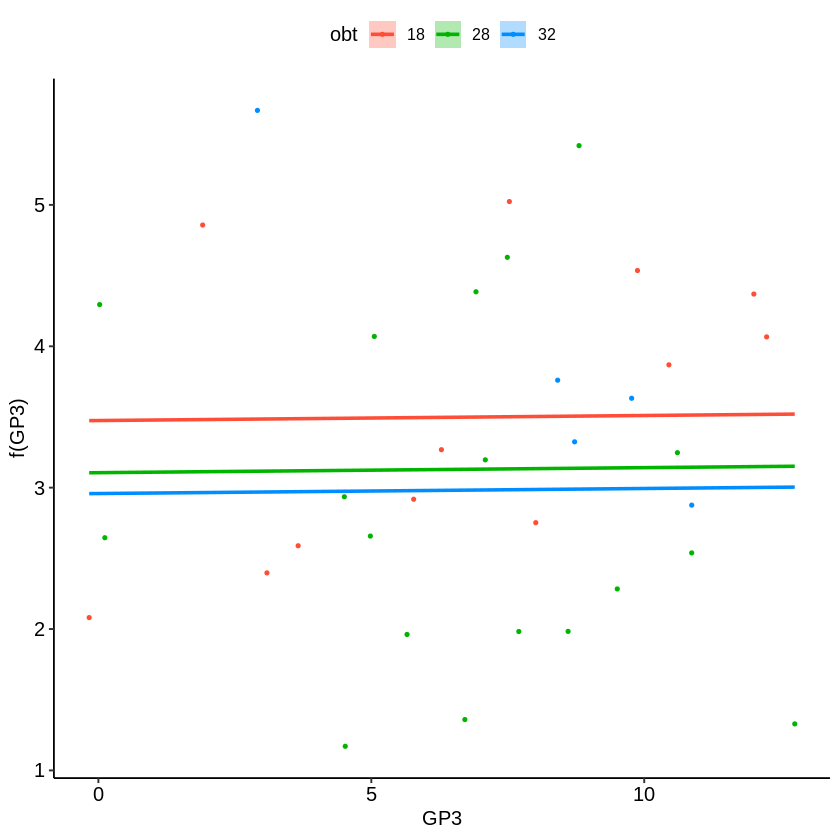

In [52]:
df <- data.frame(gc, ngc, fgc, fngc, obt, aat, dbt, nrt, njt, ffmqt, stai, dP3, dN2, GN2, GP3, nGN2, nGP3)
df <- df[-c(34, 36), ]

beta_malt <- betareg(fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai, data = df, link = "logit")
summary(beta_malt)
which(cooks.distance(beta_malt) > 1)
confint(beta_malt)

visreg(beta_malt, xvar = "GP3", overlay = TRUE, gg = TRUE, by = "obt") + theme_pubr()

# dP3 * obt, dP3, and obt, significant with fngc but not with fgc 
# dN2 * obt non sig in fgc and fngc

#Means that on average, controlling for other aspects, it is low
#However, when both observation and dP3 is high, the effect can be positive

which(cooks.distance(beta_malt) > 1)

In [53]:
priors <- c(set_prior("normal(0, 1)", class = "b"))

bayes_malt_h1<-brm(
                 bf(formula = fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai),
                 data = df,
                 family = Beta(),
                 prior = priors,
                 sample_prior = TRUE,
                 init = "random",
                 chains = 4,
                 iter = 10000,
                 warmup = 2000,
                 cores = 8,
                 seed    = 1234,
                 save_pars = save_pars(all = TRUE))

summary(bayes_malt_h1)

# Get BF10
# BF 10  = 1: no evidence for H1
# 1 < BF10 < 3: anecdotal/weak evidence for H1
# 3 < BF10 < 10: moderate evidence for H1
# 10 < BF10 < 30: strong evidence for H1
# 30 < BF10 < 100: very strong evidence for H1
# BF10  > 100: extreme evidence for H1
brms::hypothesis(bayes_malt_h1, hypothesis="GP3 > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="aat > 0")
brms::hypothesis(bayes_malt_h1, hypothesis="GP3:aat < 0")

Compiling Stan program...

Start sampling



 Family: beta 
  Links: mu = logit; phi = identity 
Formula: fgc ~ GP3 * aat + obt + dbt + nrt + njt + stai 
   Data: df (Number of observations: 35) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     1.60      1.87    -2.05     5.31 1.00    21785    21528
GP3          -0.07      0.10    -0.27     0.14 1.00    18210    19877
aat           0.01      0.04    -0.06     0.08 1.00    19801    21561
obt          -0.04      0.02    -0.08     0.00 1.00    26088    21887
dbt           0.01      0.02    -0.03     0.04 1.00    26367    22551
nrt           0.01      0.03    -0.06     0.07 1.00    26930    19953
njt           0.04      0.03    -0.01     0.09 1.00    23435    22056
stai          0.03      0.02    -0.00     0.06 1.00    23153    21314
GP3:aat       0.00      0.00    -0.01     0.01 1.00    17934    20067

Family Spec

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (GP3) > 0    -0.07       0.1    -0.24      0.1       0.31      0.24     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
  Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1  (aat) > 0     0.01      0.04    -0.05     0.07       1.33      0.57     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

Hypothesis Tests for class b:
     Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (GP3:aat) < 0        0         0        0     0.01        0.3      0.23     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

---